In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from matplotlib import style
style.use('ggplot')

import itertools
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Encoding the categorical columns
from sklearn.preprocessing import OrdinalEncoder

# Scaling
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [2]:
dataset_locally = True

In [3]:
if dataset_locally:
    file_path = 'dataset/'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = '/content/drive/MyDrive/Fraud Dataset/'

In [4]:
# Reading the training and testing datasets
train = pd.read_csv(file_path + 'fraudTrain.csv')
test = pd.read_csv(file_path + 'fraudTest.csv')

In [5]:
train.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2022-01-01 00:00:18  2703186189652095   
1           1   2022-01-01 00:00:44      630423337322   
2           2   2022-01-01 00:00:51    38859492057661   
3           3   2022-01-01 00:01:16  3534093764340240   
4           4   2022-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [6]:
test.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2022-06-21 12:14:25  2291163933867244   
1           1   2022-06-21 12:14:33  3573030041201292   
2           2   2022-06-21 12:14:53  3598215285024754   
3           3   2022-06-21 12:15:15  3591919803438423   
4           4   2022-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [7]:
# Combining the train and test datasets for data cleaning and data visulization
data = pd.concat([train, test], axis = 0)
data.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2022-01-01 00:00:18  2703186189652095   
1           1   2022-01-01 00:00:44      630423337322   
2           2   2022-01-01 00:00:51    38859492057661   
3           3   2022-01-01 00:01:16  3534093764340240   
4           4   2022-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [9]:
# Resetting the index
data.reset_index(inplace = True)
data.head(10)

index  Unnamed: 0 trans_date_trans_time            cc_num  \
0      0           0   2022-01-01 00:00:18  2703186189652095   
1      1           1   2022-01-01 00:00:44      630423337322   
2      2           2   2022-01-01 00:00:51    38859492057661   
3      3           3   2022-01-01 00:01:16  3534093764340240   
4      4           4   2022-01-01 00:03:06   375534208663984   
5      5           5   2022-01-01 00:04:08  4767265376804500   
6      6           6   2022-01-01 00:04:42    30074693890476   
7      7           7   2022-01-01 00:05:08  6011360759745864   
8      8           8   2022-01-01 00:05:18  4922710831011201   
9      9           9   2022-01-01 00:06:01  2720830304681674   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   
5    fraud_Stroman, Hudson and Erdman  gas_transport   94.63   Jennifer   
6               fraud_Rowe-Vandervort    grocery_net   44.54     Kelsey   
7                fraud_Corwin-Collins  gas_transport   71.65     Steven   
8                    fraud_Herzog Ltd       misc_pos    4.27    Heather   
9   fraud_Schoen, Kuphal and Nitzsche    grocery_pos  198.39    Melissa   

       last gender  ...      lat      long city_pop  \
0     Banks      F  ...  36.0788  -81.1781     3495   
1      Gill      F  ...  48.8878 -118.2105      149   
2   Sanchez      M  ...  42.1808 -112.2620     4154   
3     White      M  ...  46.2306 -112.1138     1939   
4    Garcia      M  ...  38.4207  -79.4629       99   
5    Conner      F  ...  40.3750  -75.2045     2158   
6  Richards      F  ...  37.9931 -100.9893     2691   
7  Williams      M  ...  38.8432  -78.6003     6018   
8     Chase      F  ...  40.3359  -79.6607     1472   
9   Aguilar      F  ...  36.5220  -87.3490   151785   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   
5                  Transport planner  1961-06-19   
6                    Arboriculturist  1993-08-16   
7               Designer, multimedia  1947-08-21   
8          Public affairs consultant  1941-03-07   
9                        Pathologist  1974-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1325376308  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1325376318  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1325376361  37.179198  -87.485381   

  is_fraud  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0  

[10 rows x 24 columns]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   Unnamed: 0             int64  
 2   trans_date_trans_time  object 
 3   cc_num                 int64  
 4   merchant               object 
 5   category               object 
 6   amt                    float64
 7   first                  object 
 8   last                   object 
 9   gender                 object 
 10  street                 object 
 11  city                   object 
 12  state                  object 
 13  zip                    int64  
 14  lat                    float64
 15  long                   float64
 16  city_pop               int64  
 17  job                    object 
 18  dob                    object 
 19  trans_num              object 
 20  unix_time              int64  
 21  merch_lat              float64
 22  merch_long        

In [11]:
# Checking for duplicate values
data.duplicated().sum()

0

In [12]:
# Checking for null values
data.isnull().sum()

index                    0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [13]:
data = data.drop(['index', 'Unnamed: 0'], axis = 1)

In [14]:
data.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

In [15]:
data.shape

(1852394, 22)

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

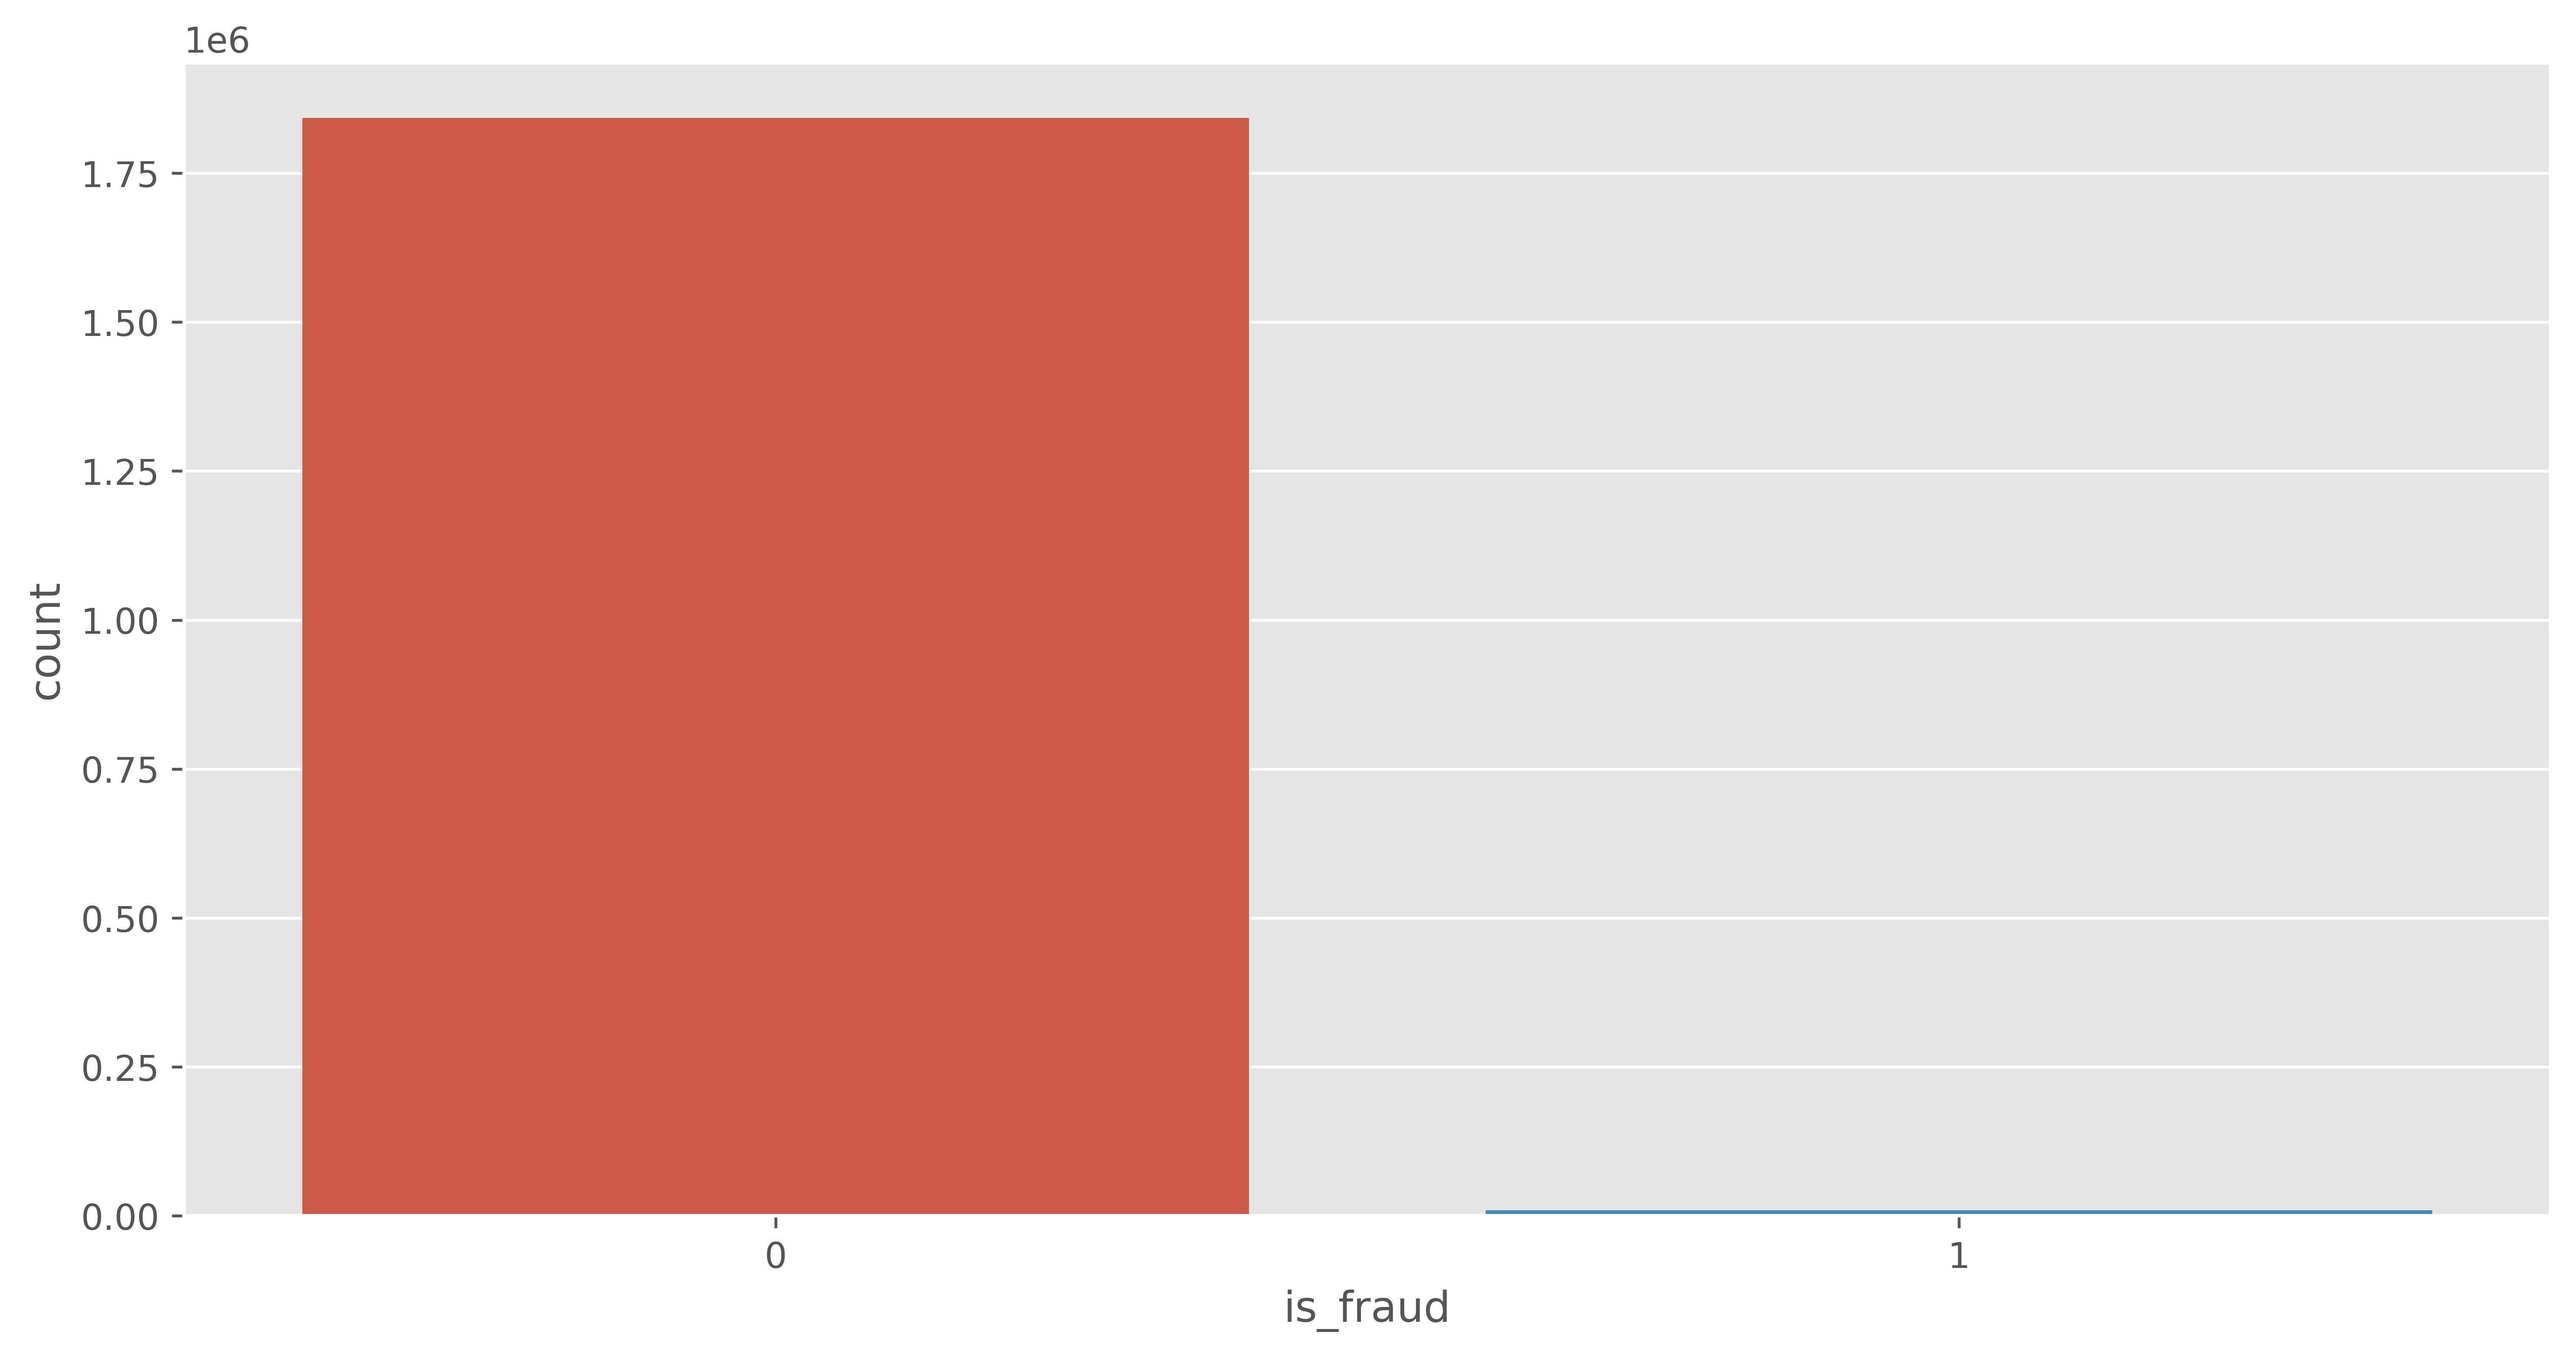

In [16]:
plt.figure(figsize = (12,6), dpi = 600)
sns.countplot(x = data['is_fraud'])

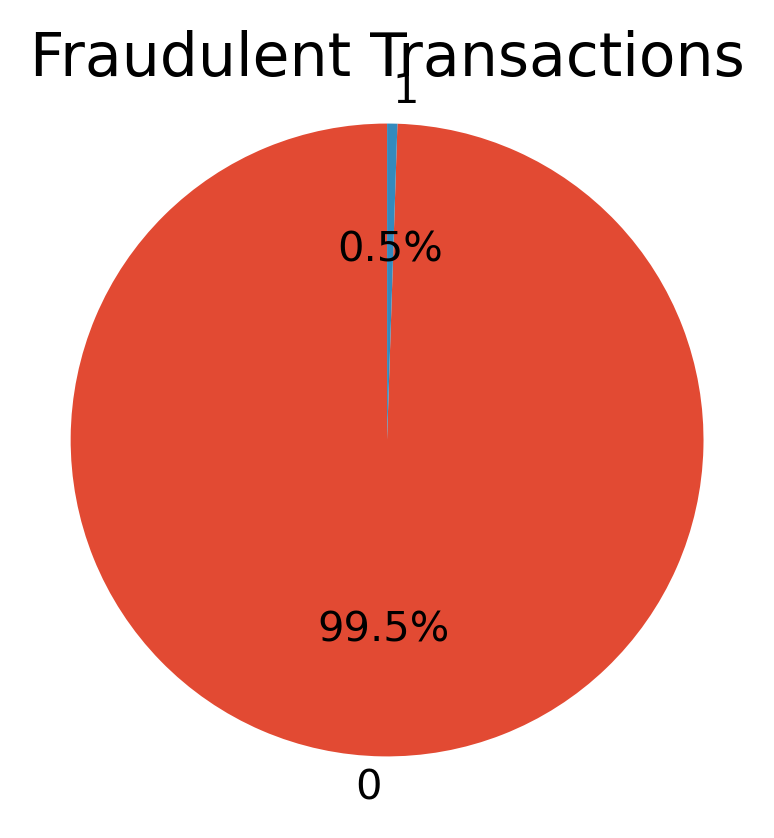

In [17]:
# Data
fraud_counts = data['is_fraud'].value_counts()

# Set the figure size
plt.figure(figsize=(3, 3), dpi=300)

# Creating the pie chart
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding a title to the chart
plt.title('Fraudulent Transactions')

# Displaying the chart
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

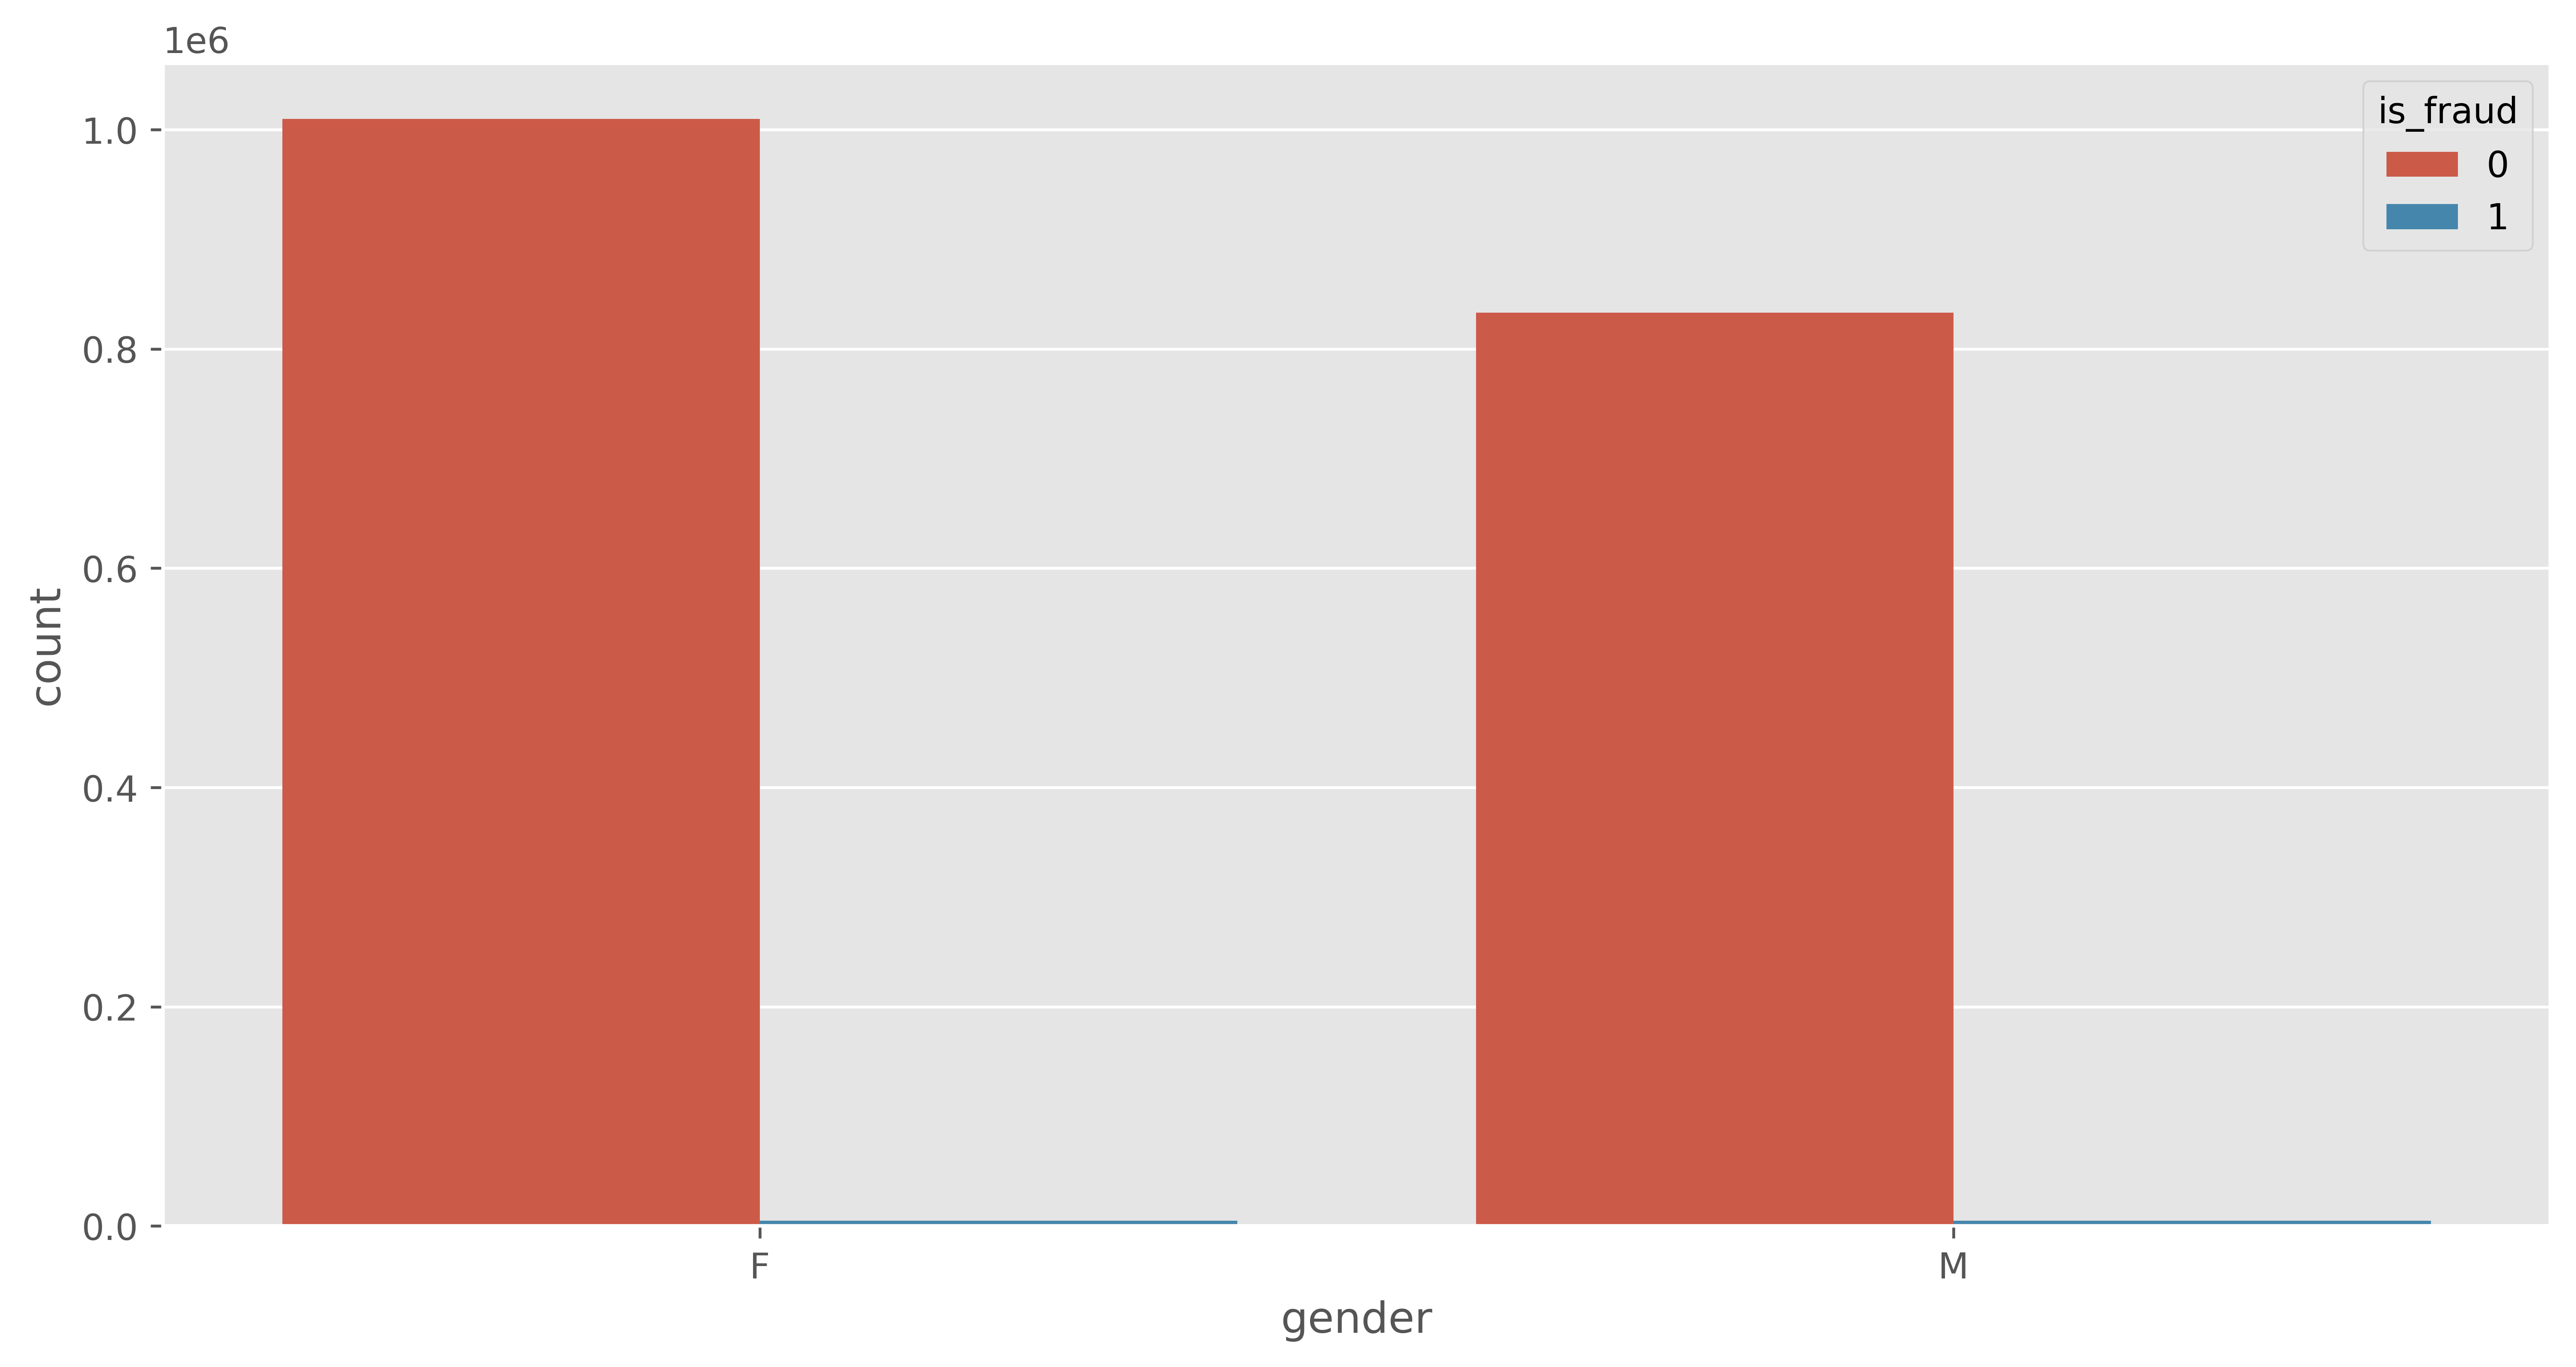

In [18]:
# Fraud wrt Gender
plt.figure(figsize = (12,6), dpi = 600)
sns.countplot(x = 'gender', hue = 'is_fraud', data = data)

In [19]:
data["is_fraud_cat"]=data.is_fraud.apply(lambda x: "T" if x==1 else "F")
data["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1852389    F
1852390    F
1852391    F
1852392    F
1852393    F
Name: is_fraud_cat, Length: 1852394, dtype: object

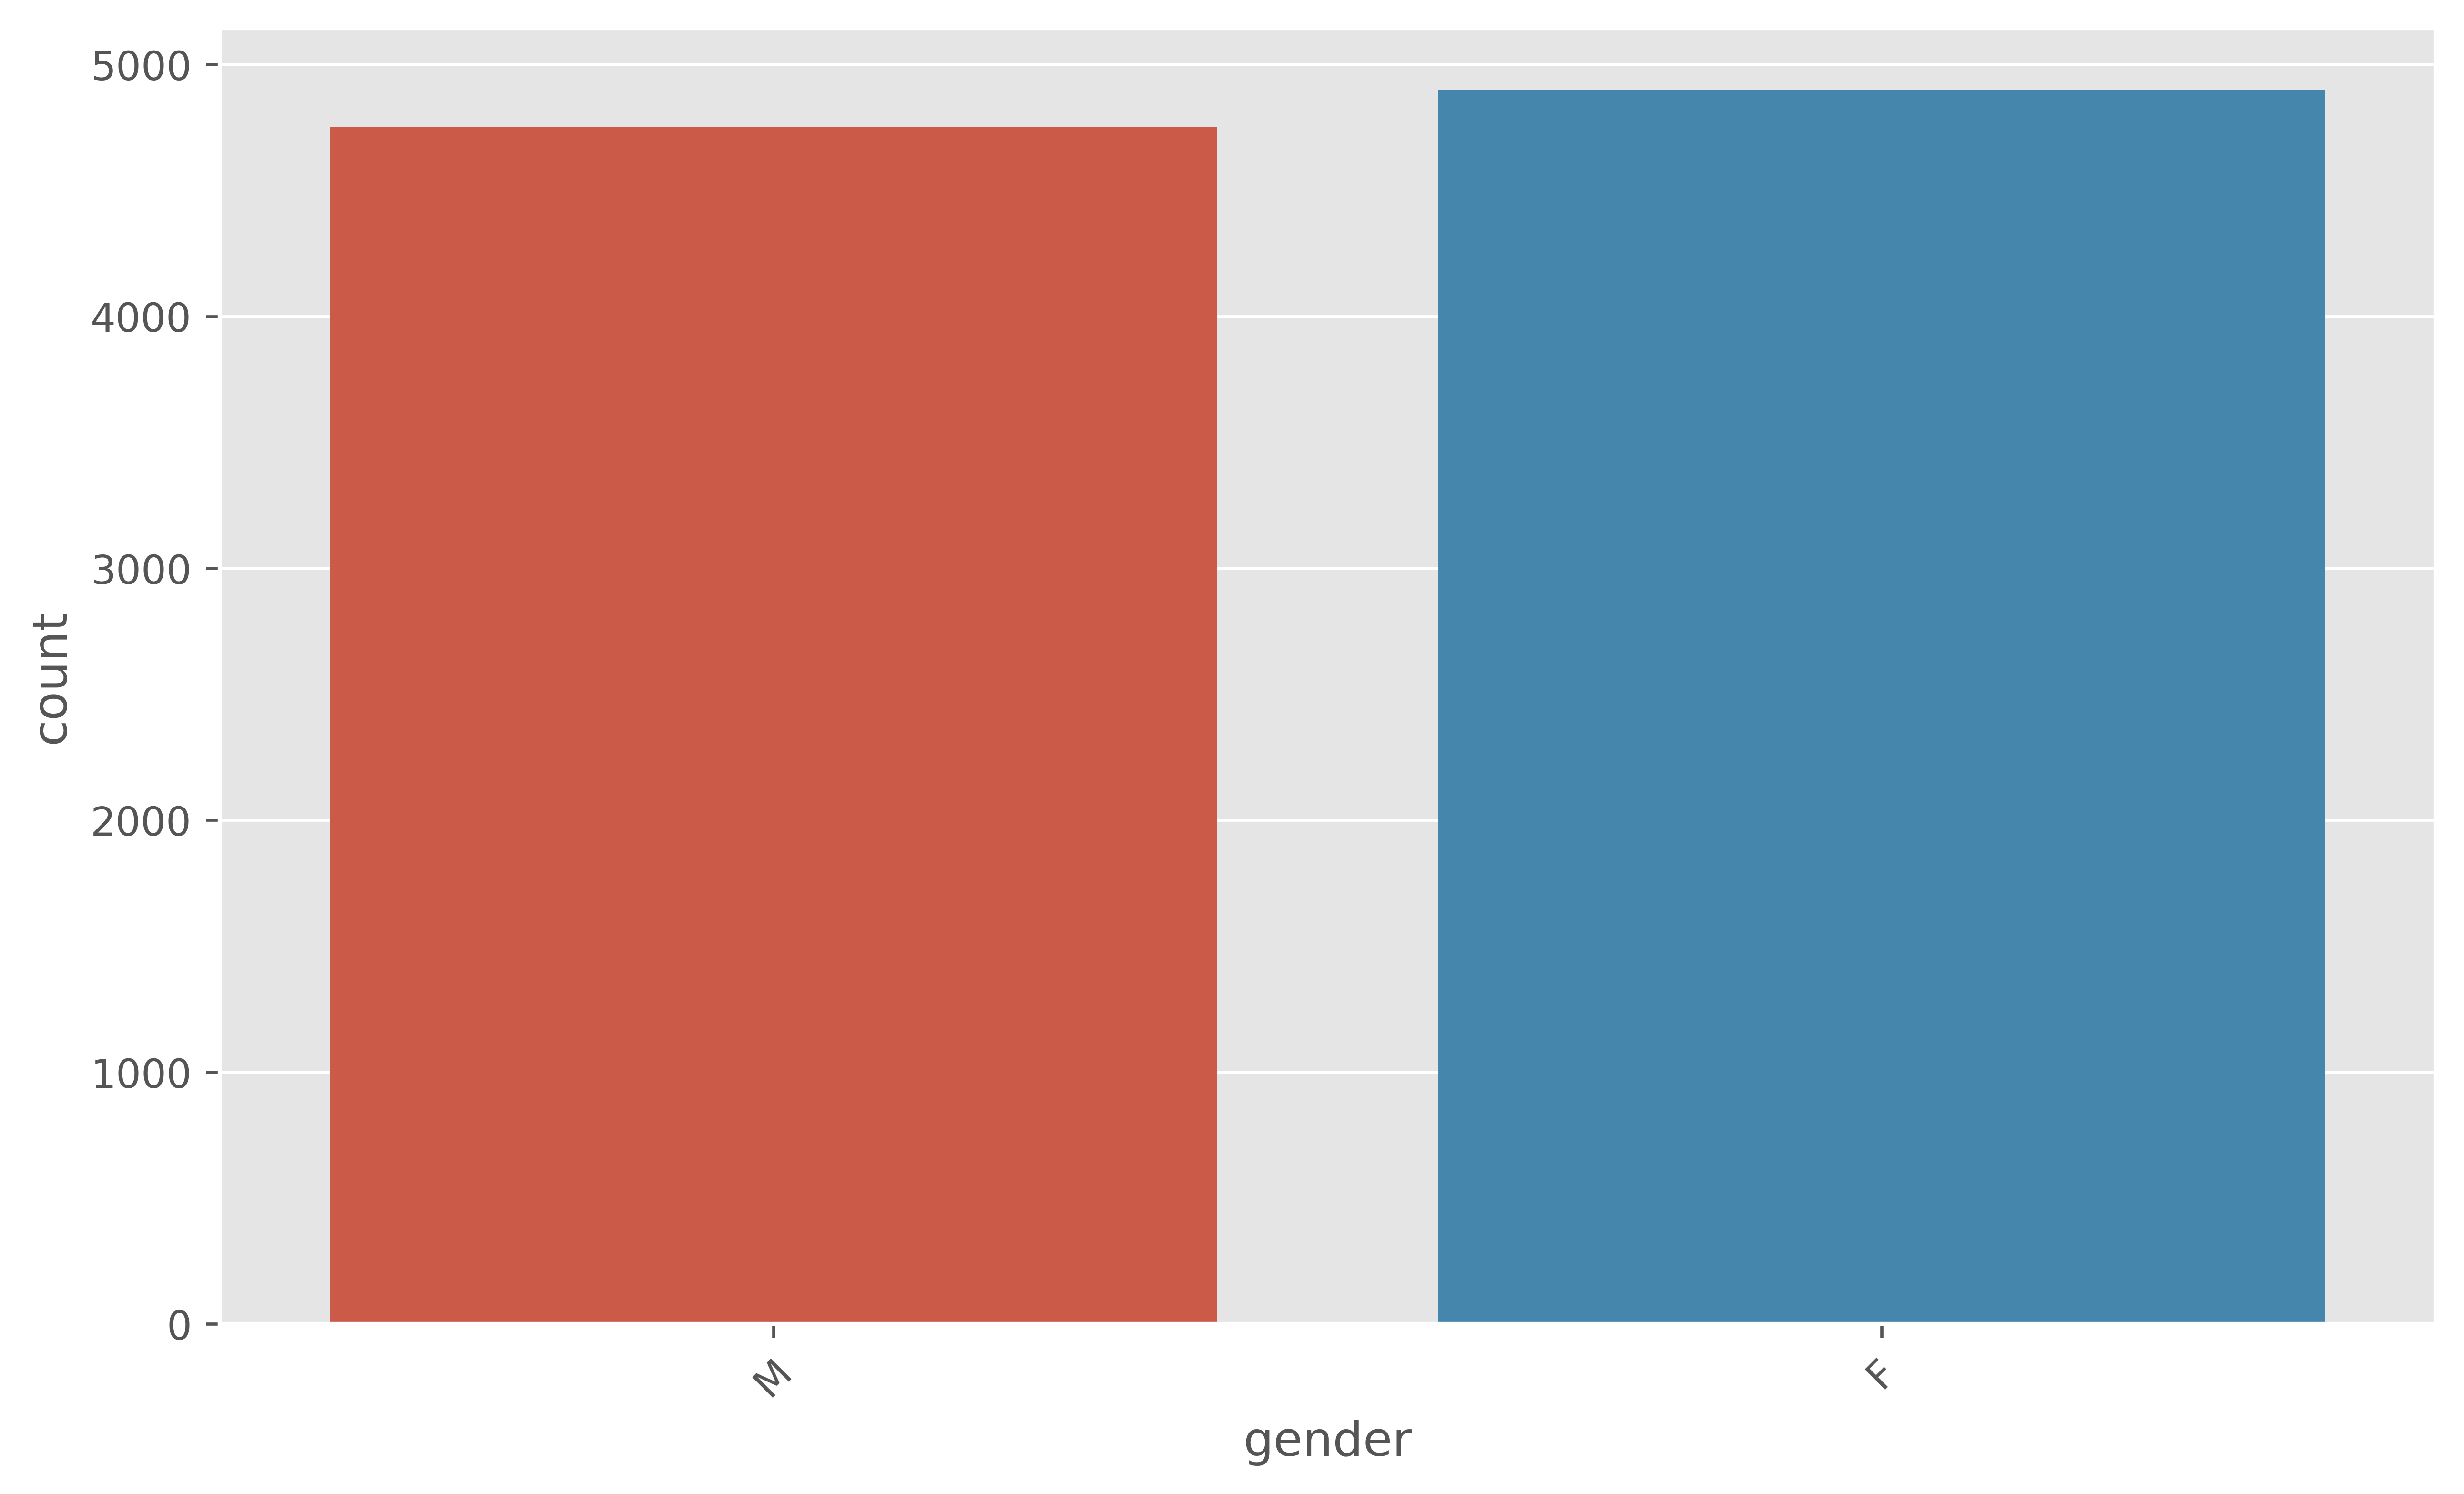

In [22]:
# Set the figure size and DPI
plt.figure(figsize=(10, 6), dpi=600)

sns.countplot(x=data[data['is_fraud_cat']=="T"].gender)
plt.xticks(rotation=45)
plt.show()

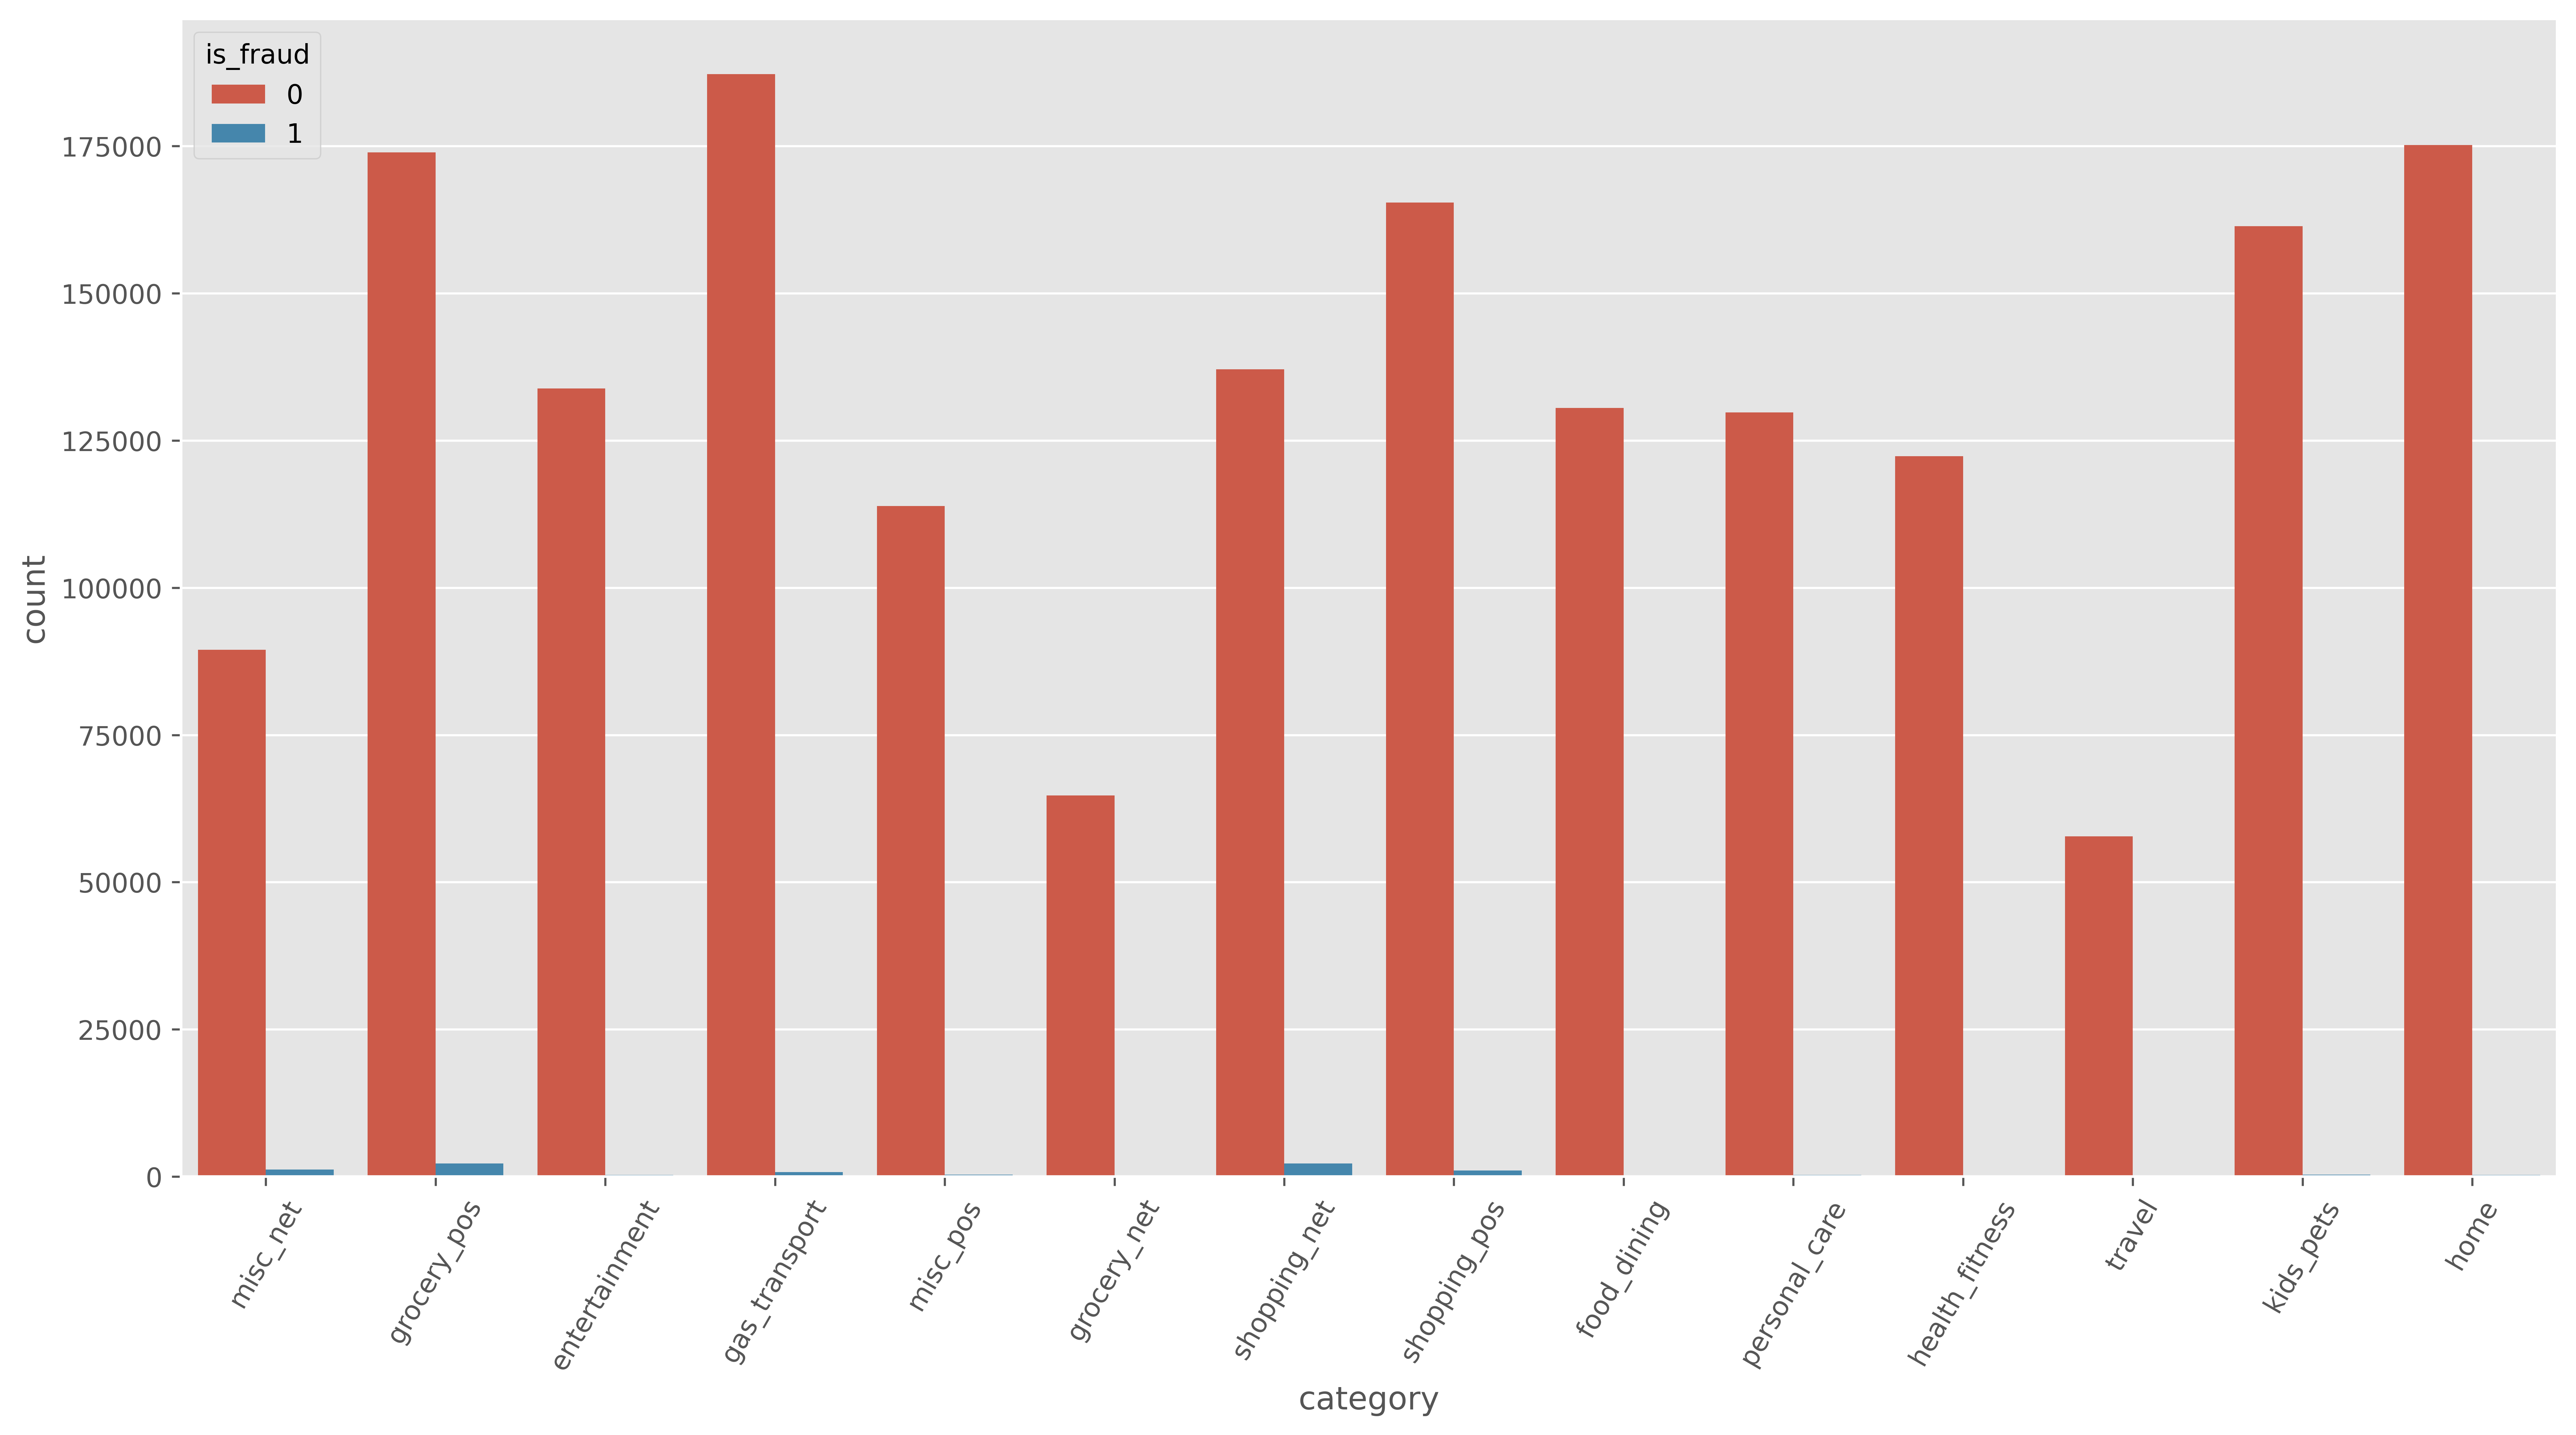

In [23]:
plt.figure(figsize = (16, 8), dpi = 600)
sns.countplot(x = 'category', hue = 'is_fraud', data = data)
plt.xticks(rotation = 60)
plt.show()

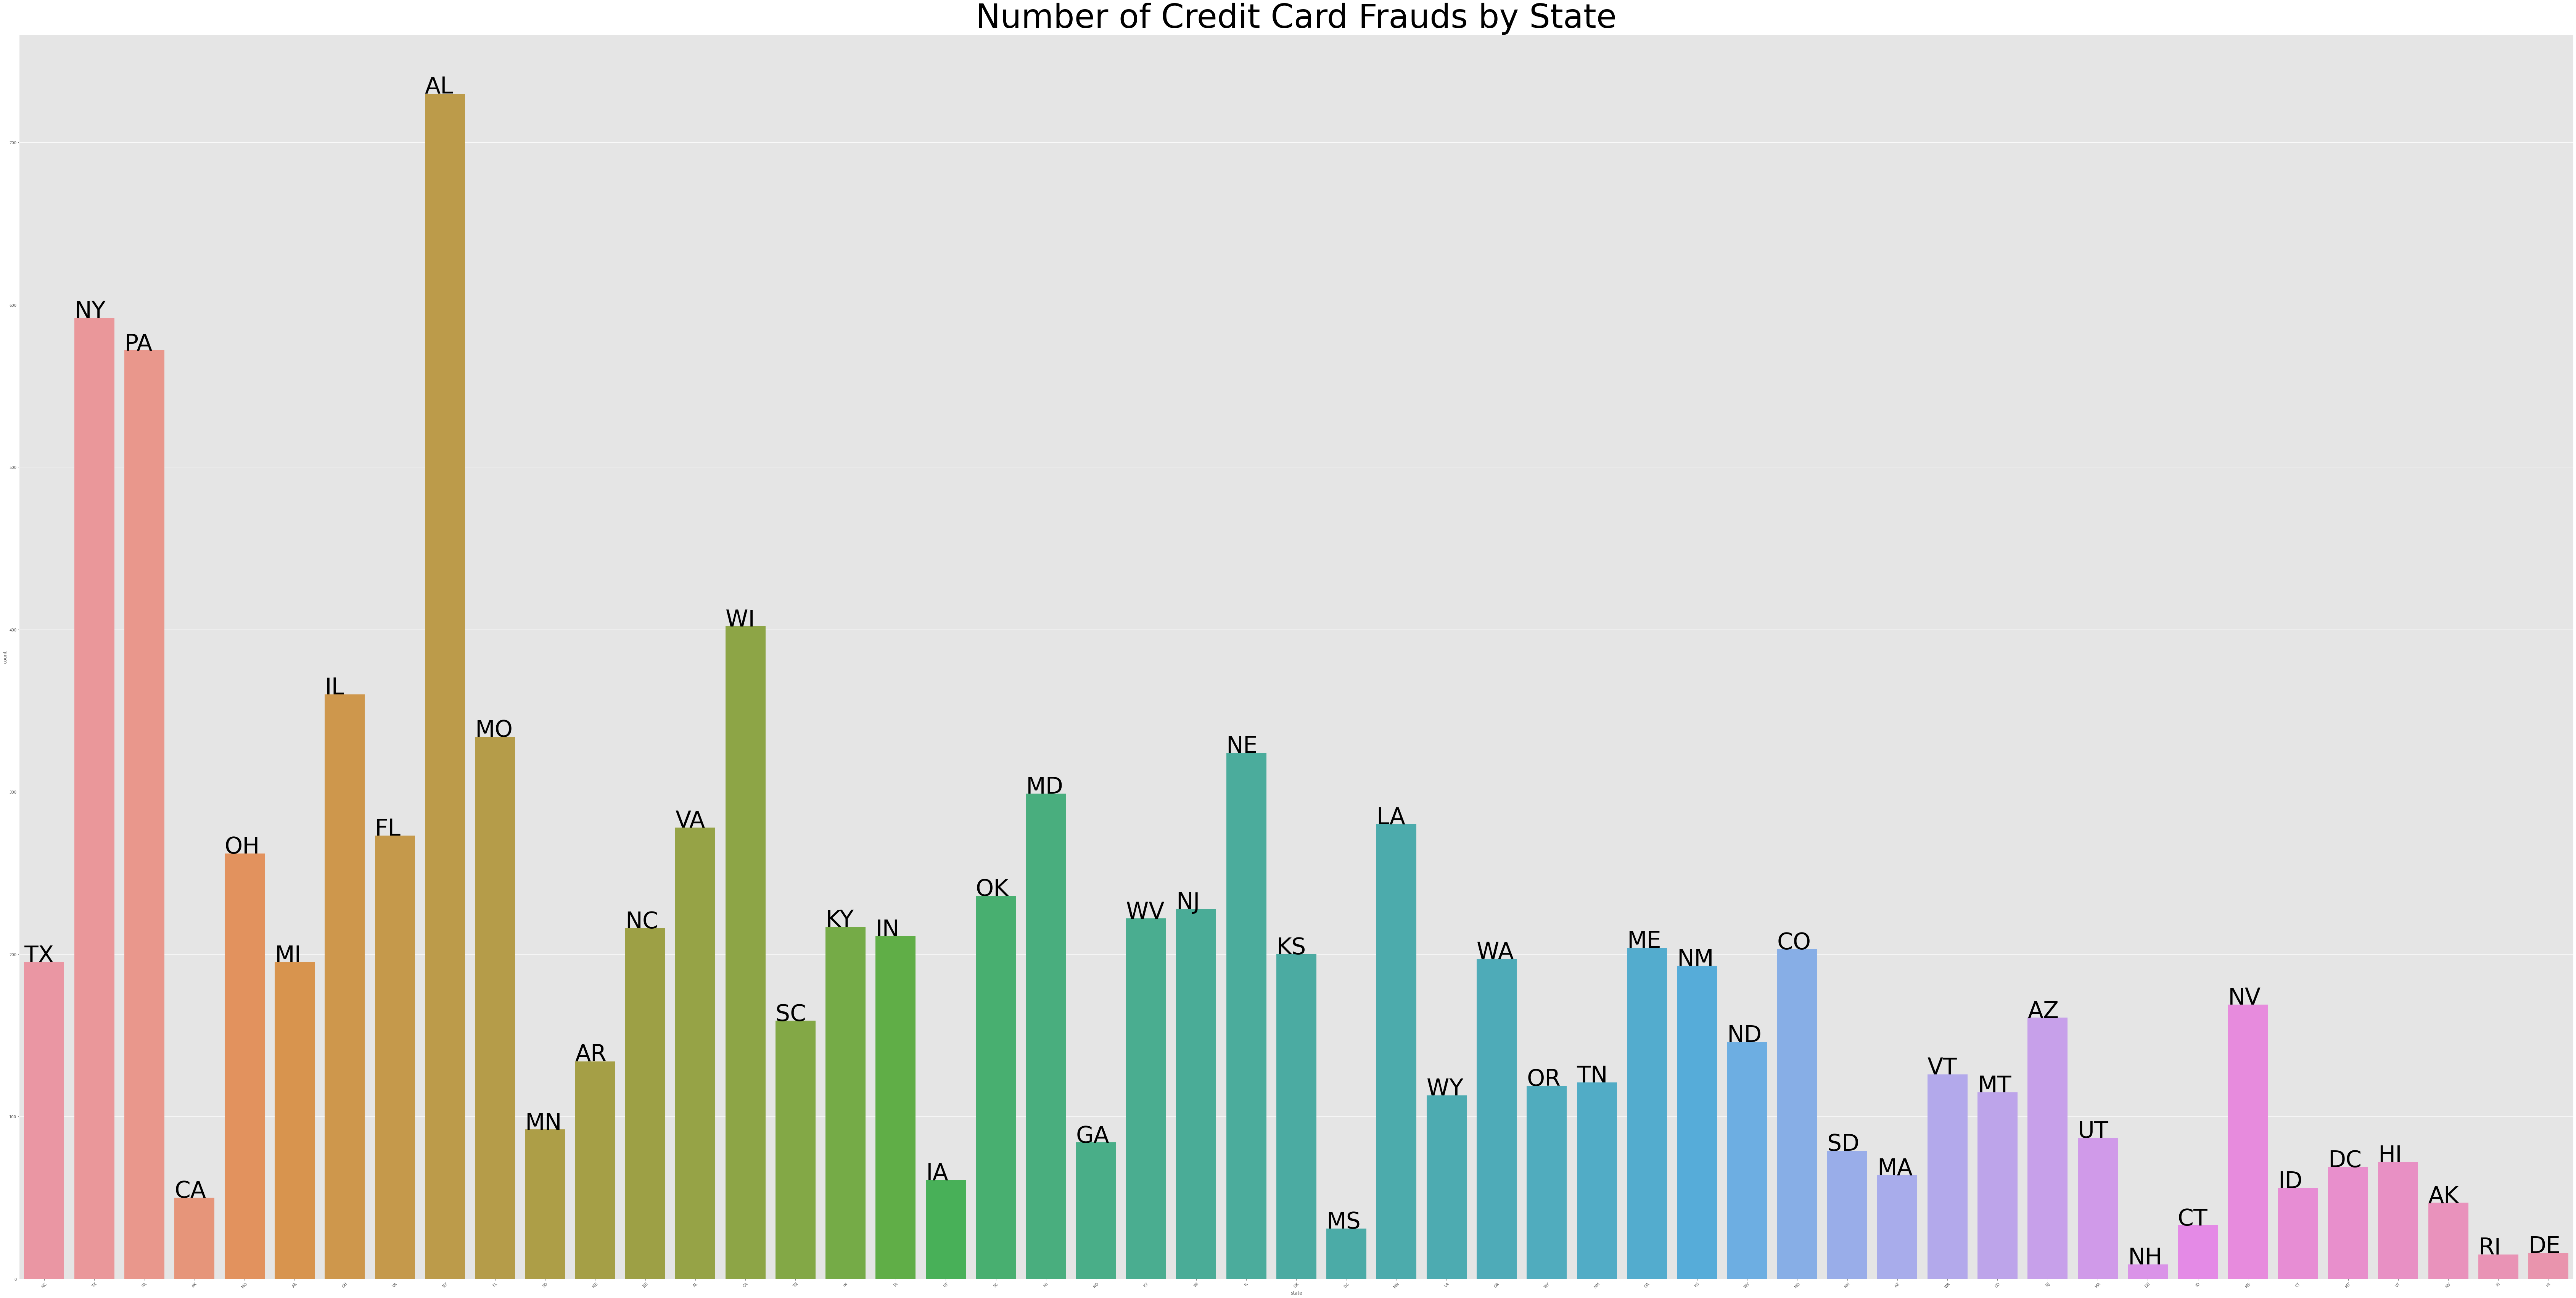

In [24]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(x=data[data['is_fraud_cat']=="T"].state)
plt.xticks(rotation=45)
for p, label in zip(ax.patches, data["state"].value_counts().index):
    ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

In [25]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

In [46]:

# Set the figure size and DPI
plt.figure(figsize=(10, 8), dpi=600)

data[data['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())

plt.title("Number of Credit Card Frauds by Job")
plt.xticks(rotation=90)

# Decrease the font size of x-axis ticks
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)

plt.show()

In [47]:
data.head()

trans_date_trans_time            cc_num                            merchant  \
0   2022-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2022-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2022-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2022-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2022-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt      first     last gender  \
0       misc_net    4.97   Jennifer    Banks      F   
1    grocery_pos  107.23  Stephanie     Gill      F   
2  entertainment  220.11     Edward  Sanchez      M   
3  gas_transport   45.00     Jeremy    White      M   
4       misc_pos   41.96      Tyler   Garcia      M   

                         street            city  ...      long  city_pop  \
0                561 Perry Cove  Moravian Falls  ...  -81.1781      3495   
1  43039 Riley Greens Suite 393          Orient  ... -118.2105       149   
2      594 White Dale Suite 530      Malad City  ... -112.2620      4154   
3   9443 Cynthia Court Apt. 038         Boulder  ... -112.1138      1939   
4              408 Bradley Rest        Doe Hill  ...  -79.4629        99   

                                 job         dob  \
0          Psychologist, counselling  1988-03-09   
1  Special educational needs teacher  1978-06-21   
2        Nature conservation officer  1962-01-19   
3                    Patent attorney  1967-01-12   
4     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  is_fraud_cat  
0         0             F  
1         0             F  
2         0             F  
3         0             F  
4         0             F  

[5 rows x 23 columns]

In [48]:
data = data.drop('is_fraud_cat', axis=1)

In [49]:
# Creating dependent and independent features dataset
X = data.drop(['is_fraud'], axis = 1)
Y = data['is_fraud']

In [50]:
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [51]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [52]:
Y = data[['is_fraud']].values

In [53]:
print('Independent Features Shape : ' , X.shape)
print('Dependent Features Shape   : ',Y.shape)

Independent Features Shape :  (1852394, 21)
Dependent Features Shape   :  (1852394, 1)


In [54]:
data['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

# Applying Undersampling

In [55]:
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(X, Y)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (19302, 21)
Labels :  (19302,)


In [56]:
# x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.3, random_state = 42)


print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (13511, 21)
Training Labels Shape :  (13511,)
Testing Data Shape    :  (5791, 21)
Testing Labels Shape  :  (5791,)


In [57]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
        
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Add a border around the matrix
    ax = plt.gca()
    ax.spines['top'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)    

In [58]:
precision_values = []
recall_values= []
y_test_values= []
pred_test_values= []

accuracy_values_train = []
accuracy_values_test = []

hyperparameter_values = []

# 1. Hyper-parameters v1

In [59]:
# Define the models
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier()

In [60]:
# Create a list of models
models = [decision_tree, knn, svm, logistic_regression, naive_bayes, random_forest]
hyperparameter_values.append(models)

In [61]:
# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)

    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)

    print('===========================================')
    print(model)
    print('===========================================')
    print()
    train=accuracy_score(y_train, pred_train)
    test=accuracy_score(y_test, pred_test)
    accuracy_values_train.append(train)
    accuracy_values_test.append(test)
    print('Training Accuracy: ', train)
    print('Testing  Accuracy: ', test)
    print()

    # Checking f1 score, precision and recall
    print('Training Set f1 score: ', f1_score(y_train, pred_train))
    print('Testing  Set f1 score: ', f1_score(y_test, pred_test))
    print()

    precision=precision_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    
    precision_values.append(precision)
    recall_values.append(recall)
    y_test_values.append(y_test)
    pred_test_values.append(pred_test)
    
    print('Test set precision : ', precision)
    print('Test set recall    : ', recall)
    print('===========================================')
    print()


DecisionTreeClassifier()

Training Accuracy:  1.0
Testing  Accuracy:  0.9554481091348644

Training Set f1 score:  1.0
Testing  Set f1 score:  0.9551927752691908

Test set precision :  0.9608665269042628
Test set recall    :  0.949585635359116

KNeighborsClassifier()

Training Accuracy:  0.7655243875360818
Testing  Accuracy:  0.6627525470557762

Training Set f1 score:  0.728395061728395
Testing  Set f1 score:  0.6055342355079781

Test set precision :  0.7294403892944039
Test set recall    :  0.517610497237569

SVC()

Training Accuracy:  0.7767004662867293
Testing  Accuracy:  0.7433949231566224

Training Set f1 score:  0.7617844453217528
Testing  Set f1 score:  0.7252218934911242

Test set precision :  0.7806528662420382
Test set recall    :  0.6771408839779005

LogisticRegression()

Training Accuracy:  0.7972762933905706
Testing  Accuracy:  0.7907097219823864

Training Set f1 score:  0.7889993066789925
Testing  Set f1 score:  0.78059377262853

Test set precision :  0.8203957382039574
Te

DecisionTreeClassifier()

KNeighborsClassifier()

SVC()

LogisticRegression()

GaussianNB()

RandomForestClassifier()



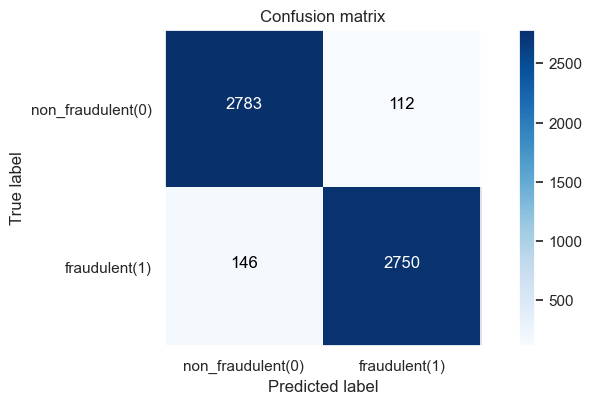

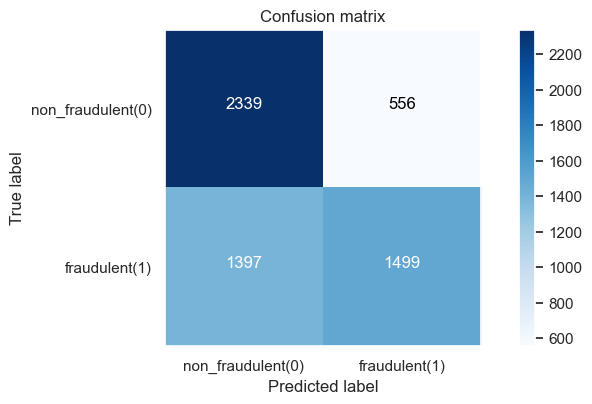

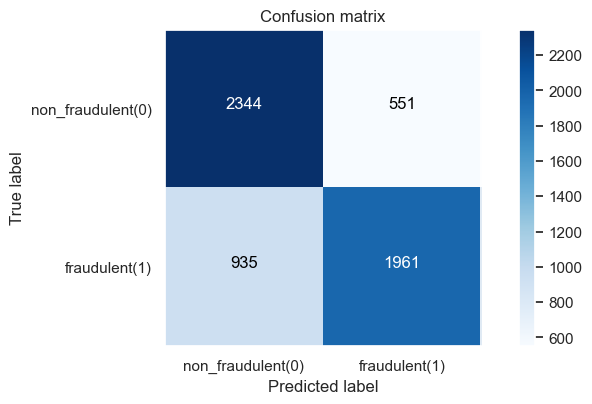

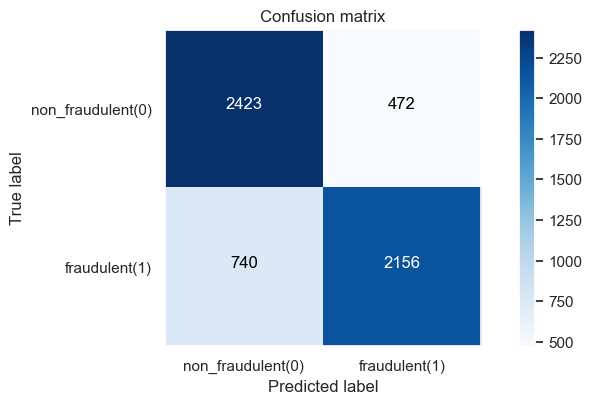

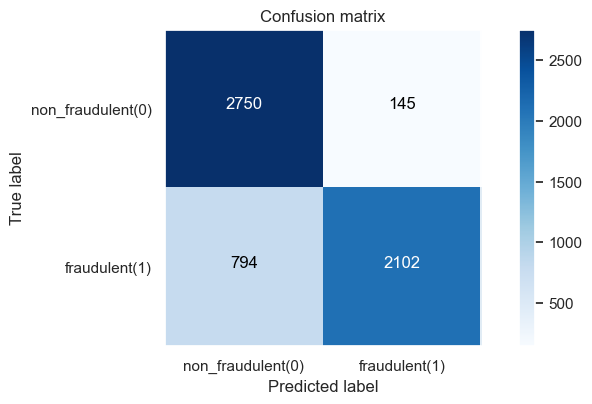

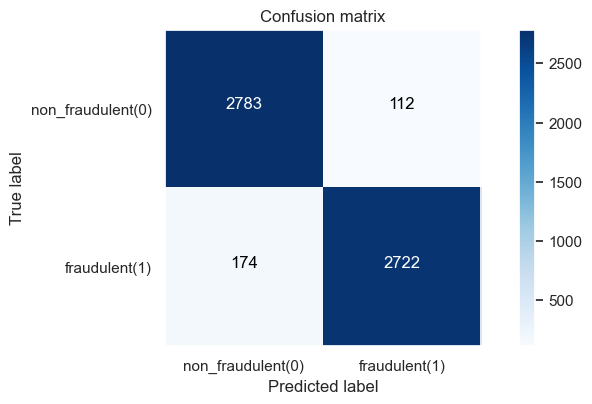

In [62]:
# Iterate over the models based on the size of the list
j=0
for i in range(len(models)):
    model = models[i]
    
    print(model)
    print()
    
    # Plotting the confusion metrics
    cm = confusion_matrix(y_test_values[j], pred_test_values[j])
    plt.figure(figsize = (8,4), dpi = 100)
    sns.set(rc = {'axes.grid' : False})
    plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])
    j+=1

# 2. Hyper-parameters v2

In [63]:
# Define the models
decision_tree = DecisionTreeClassifier(max_depth=25, random_state=50)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)
svm = SVC(shrinking=False,random_state=50)
logistic_regression = LogisticRegression(fit_intercept=False,random_state=50)
naive_bayes = GaussianNB(var_smoothing=1e-8)
random_forest = RandomForestClassifier(n_estimators=10, random_state=50)

In [64]:
# Create a list of models
models = [decision_tree, knn, svm, logistic_regression, naive_bayes, random_forest]
hyperparameter_values.append(models)

In [65]:
# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)

    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)

    print('===========================================')
    print(model)
    print('===========================================')
    print()
    train=accuracy_score(y_train, pred_train)
    test=accuracy_score(y_test, pred_test)
    accuracy_values_train.append(train)
    accuracy_values_test.append(test)
    print('Training Accuracy: ', train)
    print('Testing  Accuracy: ', test)
    print()

    # Checking f1 score, precision and recall
    print('Training Set f1 score: ', f1_score(y_train, pred_train))
    print('Testing  Set f1 score: ', f1_score(y_test, pred_test))
    print()

    precision=precision_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    
    precision_values.append(precision)
    recall_values.append(recall)
    y_test_values.append(y_test)
    pred_test_values.append(pred_test)
    
    print('Test set precision : ', precision)
    print('Test set recall    : ', recall)
    print('===========================================')
    print()


DecisionTreeClassifier(max_depth=25, random_state=50)

Training Accuracy:  1.0
Testing  Accuracy:  0.9554481091348644

Training Set f1 score:  1.0
Testing  Set f1 score:  0.9553014553014554

Test set precision :  0.9586230876216968
Test set recall    :  0.9520027624309392

KNeighborsClassifier(p=1)

Training Accuracy:  0.8076382207090519
Testing  Accuracy:  0.694698670350544

Training Set f1 score:  0.7880616488624317
Testing  Set f1 score:  0.6593448940269749

Test set precision :  0.7458587619877942
Test set recall    :  0.5908149171270718

SVC(random_state=50, shrinking=False)

Training Accuracy:  0.7767004662867293
Testing  Accuracy:  0.7433949231566224

Training Set f1 score:  0.7617844453217528
Testing  Set f1 score:  0.7252218934911242

Test set precision :  0.7806528662420382
Test set recall    :  0.6771408839779005

LogisticRegression(fit_intercept=False, random_state=50)

Training Accuracy:  0.7986825549552217
Testing  Accuracy:  0.7924365394577794

Training Set f1 score:  0.

DecisionTreeClassifier(max_depth=25, random_state=50)

KNeighborsClassifier(p=1)

SVC(random_state=50, shrinking=False)

LogisticRegression(fit_intercept=False, random_state=50)

GaussianNB(var_smoothing=1e-08)

RandomForestClassifier(n_estimators=10, random_state=50)



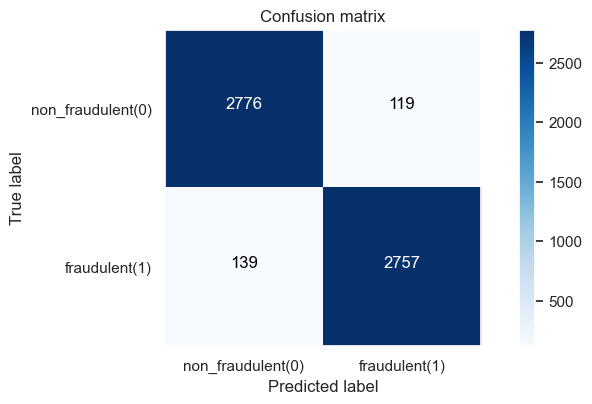

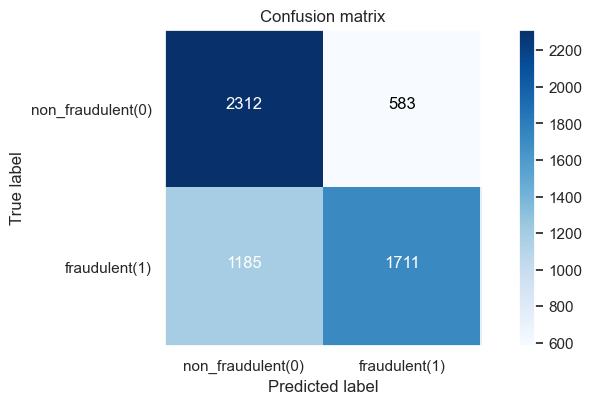

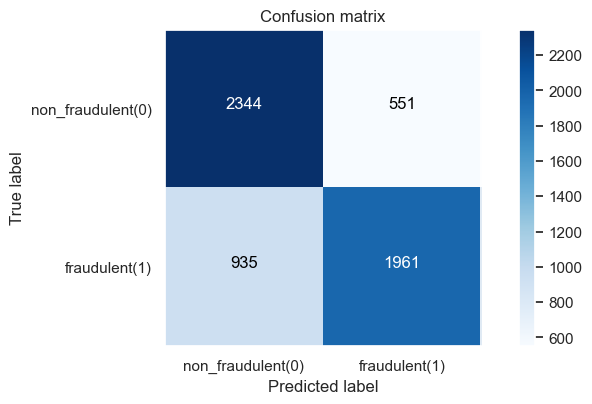

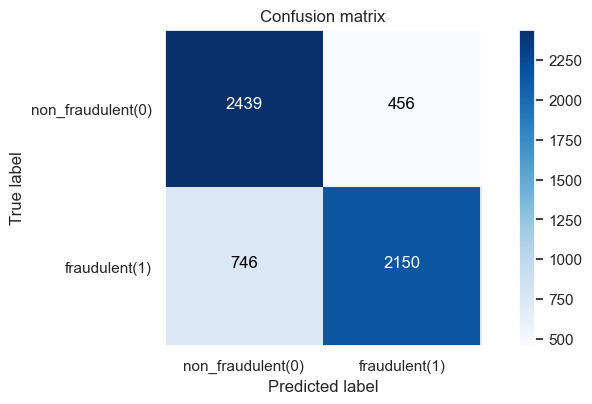

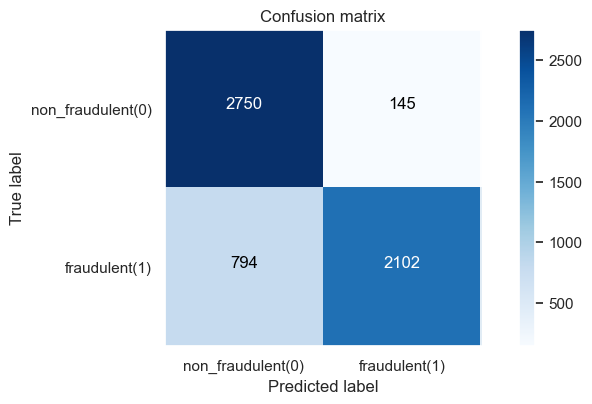

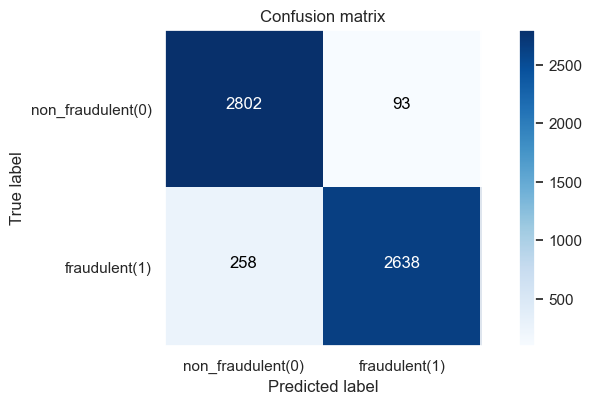

In [66]:
# Iterate over the models based on the size of the list
j=6
for i in range(len(models)):
    model = models[i]
    
    print(model)
    print()
    
    # Plotting the confusion metrics
    cm = confusion_matrix(y_test_values[j], pred_test_values[j])
    plt.figure(figsize = (8,4), dpi = 100)
    sns.set(rc = {'axes.grid' : False})
    plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])
    j+=1

# 3. Hyper-parameters v3

In [67]:
# Define the models
decision_tree = DecisionTreeClassifier(max_depth=50, random_state=100)
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
svm = SVC(shrinking=False,random_state=100)
logistic_regression = LogisticRegression(fit_intercept=False,random_state=100)
naive_bayes = GaussianNB(var_smoothing=1e-7)
random_forest = RandomForestClassifier(n_estimators=20, random_state=100)

In [68]:
# Create a list of models
models = [decision_tree, knn, svm, logistic_regression, naive_bayes, random_forest]
hyperparameter_values.append(models)

In [69]:
# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)

    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)

    print('===========================================')
    print(model)
    print('===========================================')
    print()
    train=accuracy_score(y_train, pred_train)
    test=accuracy_score(y_test, pred_test)
    accuracy_values_train.append(train)
    accuracy_values_test.append(test)
    print('Training Accuracy: ', train)
    print('Testing  Accuracy: ', test)
    print()

    # Checking f1 score, precision and recall
    print('Training Set f1 score: ', f1_score(y_train, pred_train))
    print('Testing  Set f1 score: ', f1_score(y_test, pred_test))
    print()

    precision=precision_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    
    precision_values.append(precision)
    recall_values.append(recall)
    y_test_values.append(y_test)
    pred_test_values.append(pred_test)
    
    print('Test set precision : ', precision)
    print('Test set recall    : ', recall)
    print('===========================================')
    print()


DecisionTreeClassifier(max_depth=50, random_state=100)

Training Accuracy:  1.0
Testing  Accuracy:  0.9547573821447073

Training Set f1 score:  1.0
Testing  Set f1 score:  0.9545769764216366

Test set precision :  0.9585654596100278
Test set recall    :  0.950621546961326

KNeighborsClassifier()

Training Accuracy:  0.7655243875360818
Testing  Accuracy:  0.6627525470557762

Training Set f1 score:  0.728395061728395
Testing  Set f1 score:  0.6055342355079781

Test set precision :  0.7294403892944039
Test set recall    :  0.517610497237569

SVC(random_state=100, shrinking=False)

Training Accuracy:  0.7767004662867293
Testing  Accuracy:  0.7433949231566224

Training Set f1 score:  0.7617844453217528
Testing  Set f1 score:  0.7252218934911242

Test set precision :  0.7806528662420382
Test set recall    :  0.6771408839779005

LogisticRegression(fit_intercept=False, random_state=100)

Training Accuracy:  0.7986825549552217
Testing  Accuracy:  0.7924365394577794

Training Set f1 score:  0.78

DecisionTreeClassifier(max_depth=50, random_state=100)

KNeighborsClassifier()

SVC(random_state=100, shrinking=False)

LogisticRegression(fit_intercept=False, random_state=100)

GaussianNB(var_smoothing=1e-07)

RandomForestClassifier(n_estimators=20, random_state=100)



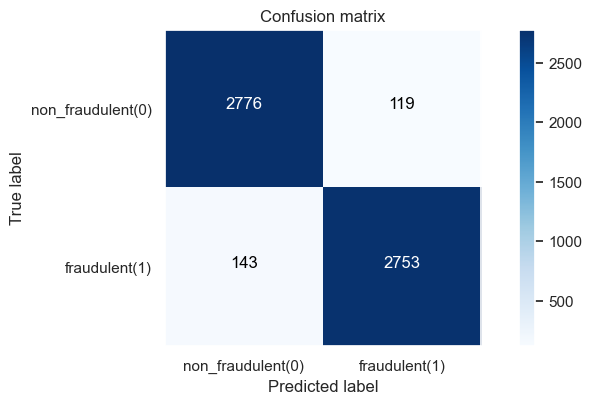

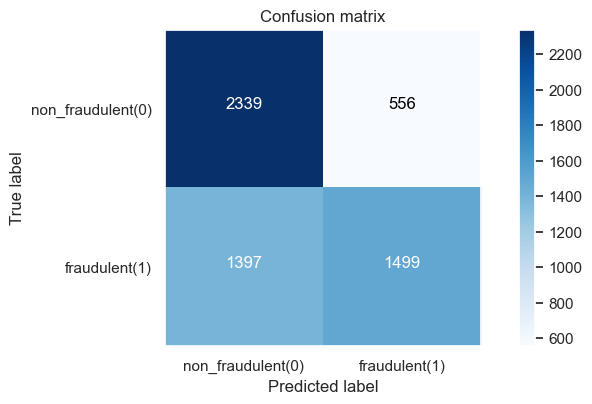

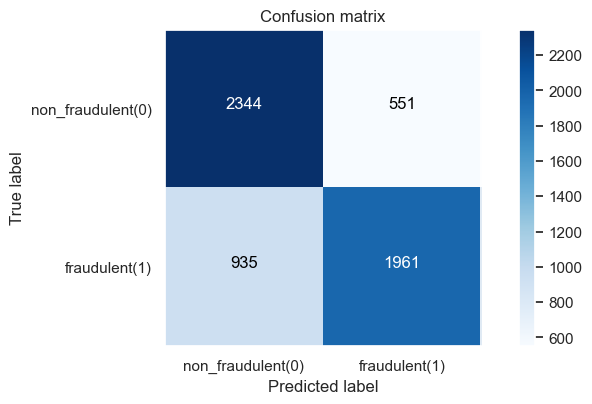

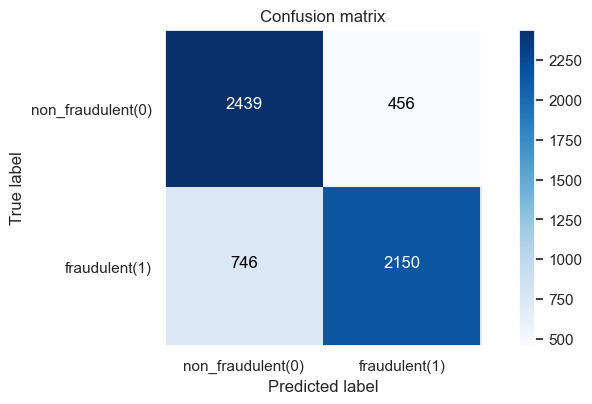

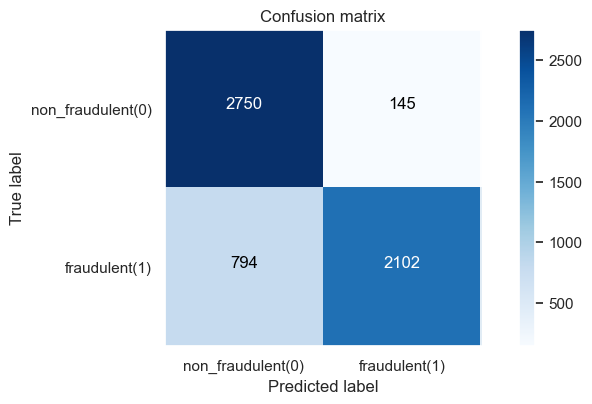

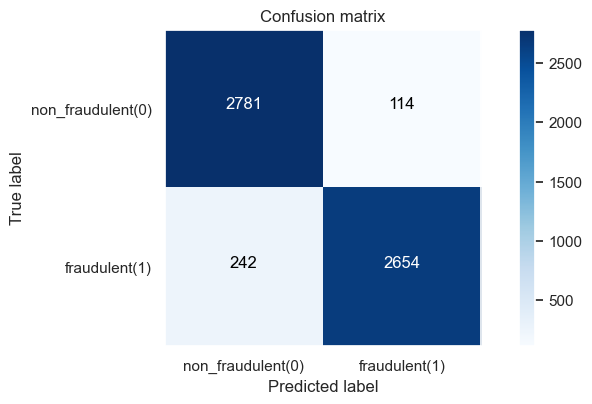

In [70]:
# Iterate over the models based on the size of the list
j=12
for i in range(len(models)):
    model = models[i]
    
    print(model)
    print()
    
    # Plotting the confusion metrics
    cm = confusion_matrix(y_test_values[j], pred_test_values[j])
    plt.figure(figsize = (8,4), dpi = 100)
    sns.set(rc = {'axes.grid' : False})
    plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])
    j+=1

# 4. Hyper-parameters v4

In [71]:
# Define the models
decision_tree = DecisionTreeClassifier(max_depth=75, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1)
svm = SVC(shrinking=False,random_state=42)
logistic_regression = LogisticRegression(fit_intercept=False,random_state=42)
naive_bayes = GaussianNB(var_smoothing=1e-5)
random_forest = RandomForestClassifier(n_estimators=25, random_state=42)

In [72]:
# Create a list of models
models = [decision_tree, knn, svm, logistic_regression, naive_bayes, random_forest]
hyperparameter_values.append(models)

In [73]:
# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)

    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)

    print('===========================================')
    print(model)
    print('===========================================')
    print()
    train=accuracy_score(y_train, pred_train)
    test=accuracy_score(y_test, pred_test)
    accuracy_values_train.append(train)
    accuracy_values_test.append(test)
    print('Training Accuracy: ', train)
    print('Testing  Accuracy: ', test)
    print()

    # Checking f1 score, precision and recall
    print('Training Set f1 score: ', f1_score(y_train, pred_train))
    print('Testing  Set f1 score: ', f1_score(y_test, pred_test))
    print()

    precision=precision_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    
    precision_values.append(precision)
    recall_values.append(recall)
    y_test_values.append(y_test)
    pred_test_values.append(pred_test)
    
    print('Test set precision : ', precision)
    print('Test set recall    : ', recall)
    print('===========================================')
    print()


DecisionTreeClassifier(max_depth=75, random_state=42)

Training Accuracy:  1.0
Testing  Accuracy:  0.9571749266102573

Training Set f1 score:  1.0
Testing  Set f1 score:  0.957033957033957

Test set precision :  0.9603616133518776
Test set recall    :  0.9537292817679558

KNeighborsClassifier(n_neighbors=10, p=1)

Training Accuracy:  0.7385093627414699
Testing  Accuracy:  0.6720773614228976

Training Set f1 score:  0.6890785884009504
Testing  Set f1 score:  0.6057712269047125

Test set precision :  0.7595002602811036
Test set recall    :  0.5037983425414365

SVC(random_state=42, shrinking=False)

Training Accuracy:  0.7767004662867293
Testing  Accuracy:  0.7433949231566224

Training Set f1 score:  0.7617844453217528
Testing  Set f1 score:  0.7252218934911242

Test set precision :  0.7806528662420382
Test set recall    :  0.6771408839779005

LogisticRegression(fit_intercept=False, random_state=42)

Training Accuracy:  0.7986825549552217
Testing  Accuracy:  0.7924365394577794

Training S

DecisionTreeClassifier(max_depth=75, random_state=42)

KNeighborsClassifier(n_neighbors=10, p=1)

SVC(random_state=42, shrinking=False)

LogisticRegression(fit_intercept=False, random_state=42)

GaussianNB(var_smoothing=1e-05)

RandomForestClassifier(n_estimators=25, random_state=42)



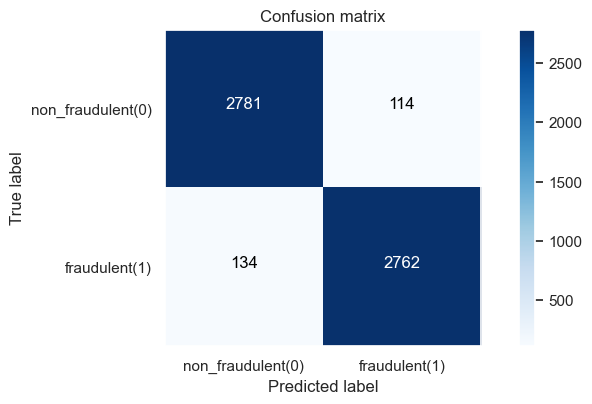

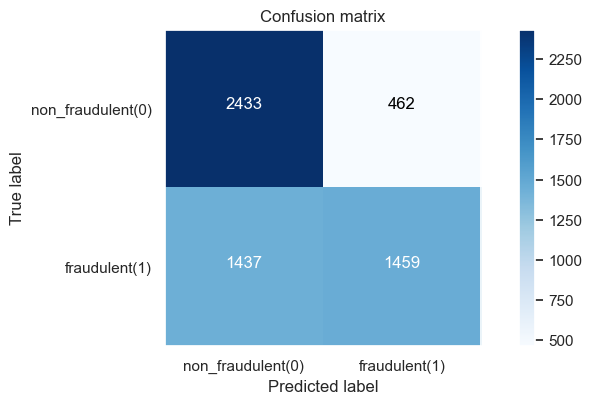

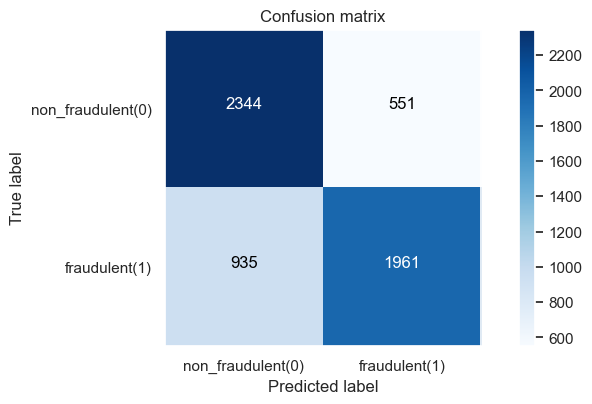

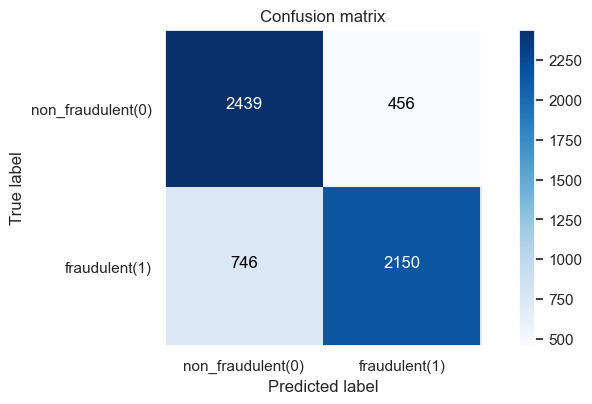

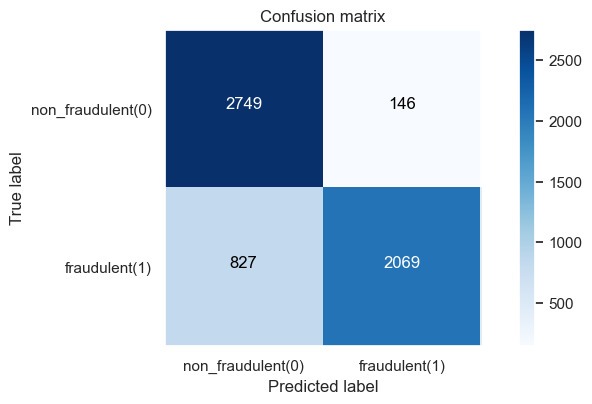

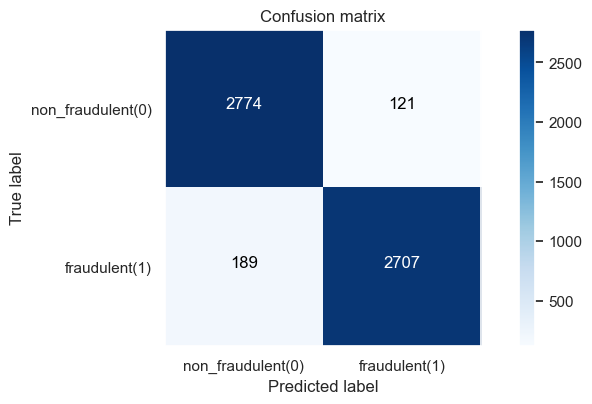

In [74]:
# Iterate over the models based on the size of the list
j=18
for i in range(len(models)):
    model = models[i]
    
    print(model)
    print()
    
    # Plotting the confusion metrics
    cm = confusion_matrix(y_test_values[j], pred_test_values[j])
    plt.figure(figsize = (8,4), dpi = 100)
    sns.set(rc = {'axes.grid' : False})
    plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])
    j+=1

# 5. Hyper-parameters v5

In [75]:
# Define the models
decision_tree = DecisionTreeClassifier(max_depth=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
svm = SVC(shrinking=True,random_state=42)
logistic_regression = LogisticRegression(fit_intercept=False,random_state=42)
naive_bayes = GaussianNB(var_smoothing=1e-3)
random_forest = RandomForestClassifier(n_estimators=30, random_state=42)

In [76]:
# Create a list of models
models = [decision_tree, knn, svm, logistic_regression, naive_bayes, random_forest]
hyperparameter_values.append(models)

In [77]:
# Train and evaluate each model
for model in models:
    model.fit(x_train, y_train)

    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)

    print('===========================================')
    print(model)
    print('===========================================')
    print()
    train=accuracy_score(y_train, pred_train)
    test=accuracy_score(y_test, pred_test)
    accuracy_values_train.append(train)
    accuracy_values_test.append(test)
    print('Training Accuracy: ', train)
    print('Testing  Accuracy: ', test)
    print()

    # Checking f1 score, precision and recall
    print('Training Set f1 score: ', f1_score(y_train, pred_train))
    print('Testing  Set f1 score: ', f1_score(y_test, pred_test))
    print()

    precision=precision_score(y_test, pred_test)
    recall=recall_score(y_test, pred_test)
    
    precision_values.append(precision)
    recall_values.append(recall)
    y_test_values.append(y_test)
    pred_test_values.append(pred_test)
    
    print('Test set precision : ', precision)
    print('Test set recall    : ', recall)
    print('===========================================')
    print()


DecisionTreeClassifier(max_depth=100, random_state=42)

Training Accuracy:  1.0
Testing  Accuracy:  0.9571749266102573

Training Set f1 score:  1.0
Testing  Set f1 score:  0.957033957033957

Test set precision :  0.9603616133518776
Test set recall    :  0.9537292817679558

KNeighborsClassifier(n_neighbors=10)

Training Accuracy:  0.7100880763822071
Testing  Accuracy:  0.6446209635641512

Training Set f1 score:  0.6382192666481944
Testing  Set f1 score:  0.5494746059544658

Test set precision :  0.7505980861244019
Test set recall    :  0.4333563535911602

SVC(random_state=42)

Training Accuracy:  0.7767004662867293
Testing  Accuracy:  0.7433949231566224

Training Set f1 score:  0.7617844453217528
Testing  Set f1 score:  0.7252218934911242

Test set precision :  0.7806528662420382
Test set recall    :  0.6771408839779005

LogisticRegression(fit_intercept=False, random_state=42)

Training Accuracy:  0.7986825549552217
Testing  Accuracy:  0.7924365394577794

Training Set f1 score:  0.78963

DecisionTreeClassifier(max_depth=100, random_state=42)

KNeighborsClassifier(n_neighbors=10)

SVC(random_state=42)

LogisticRegression(fit_intercept=False, random_state=42)

GaussianNB(var_smoothing=0.001)

RandomForestClassifier(n_estimators=30, random_state=42)



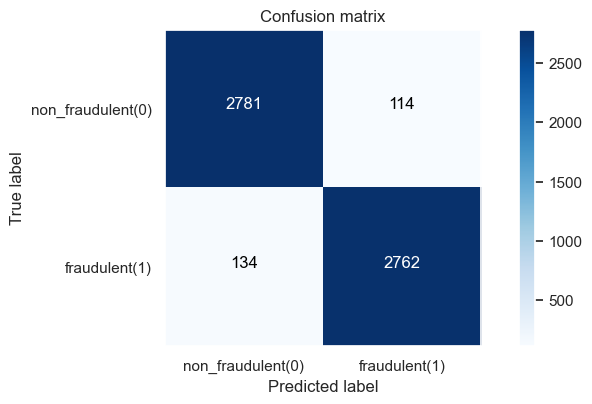

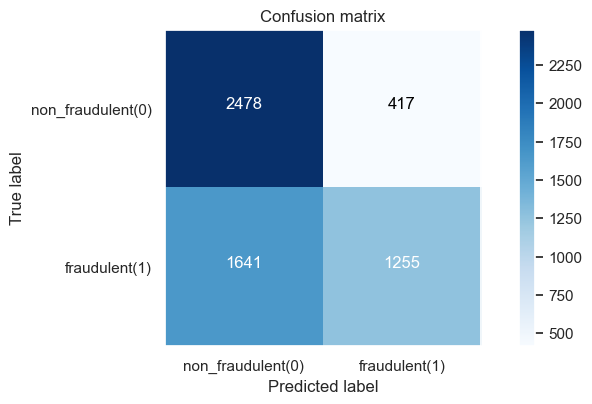

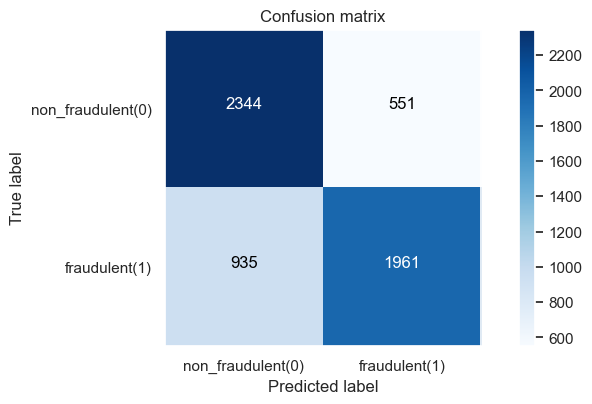

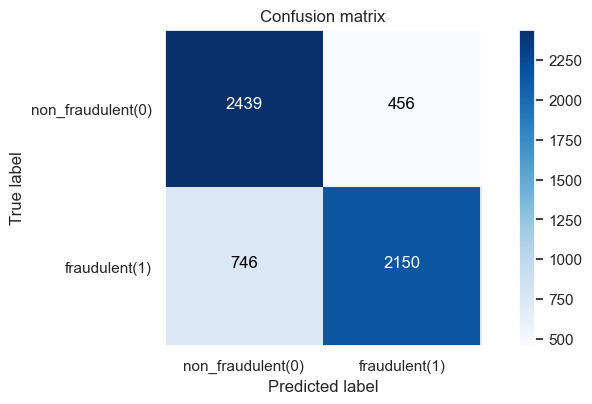

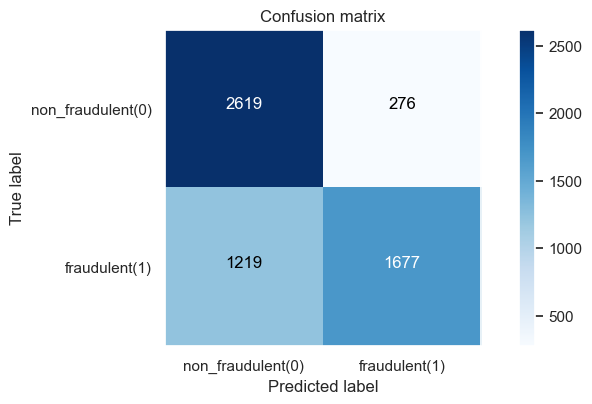

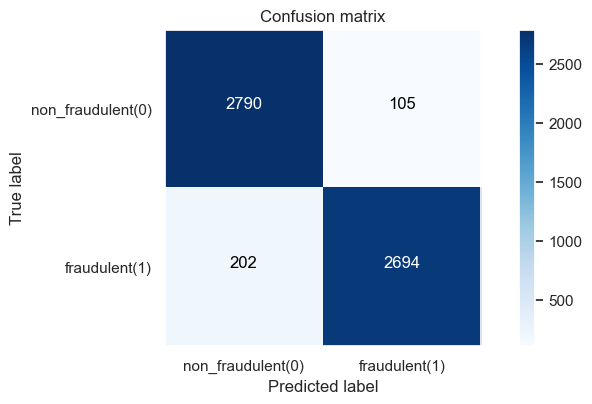

In [78]:
# Iterate over the models based on the size of the list
j=24
for i in range(len(models)):
    model = models[i]
    
    print(model)
    print()
    
    # Plotting the confusion metrics
    cm = confusion_matrix(y_test_values[j], pred_test_values[j])
    plt.figure(figsize = (8,4), dpi = 100)
    sns.set(rc = {'axes.grid' : False})
    plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])
    j+=1

In [79]:
# recall_values

In [80]:
# precision_values

In [81]:
hyperparameter_values

[[DecisionTreeClassifier(),
  KNeighborsClassifier(),
  SVC(),
  LogisticRegression(),
  GaussianNB(),
  RandomForestClassifier()],
 [DecisionTreeClassifier(max_depth=25, random_state=50),
  KNeighborsClassifier(p=1),
  SVC(random_state=50, shrinking=False),
  LogisticRegression(fit_intercept=False, random_state=50),
  GaussianNB(var_smoothing=1e-08),
  RandomForestClassifier(n_estimators=10, random_state=50)],
 [DecisionTreeClassifier(max_depth=50, random_state=100),
  KNeighborsClassifier(),
  SVC(random_state=100, shrinking=False),
  LogisticRegression(fit_intercept=False, random_state=100),
  GaussianNB(var_smoothing=1e-07),
  RandomForestClassifier(n_estimators=20, random_state=100)],
 [DecisionTreeClassifier(max_depth=75, random_state=42),
  KNeighborsClassifier(n_neighbors=10, p=1),
  SVC(random_state=42, shrinking=False),
  LogisticRegression(fit_intercept=False, random_state=42),
  GaussianNB(var_smoothing=1e-05),
  RandomForestClassifier(n_estimators=25, random_state=42)],
 [

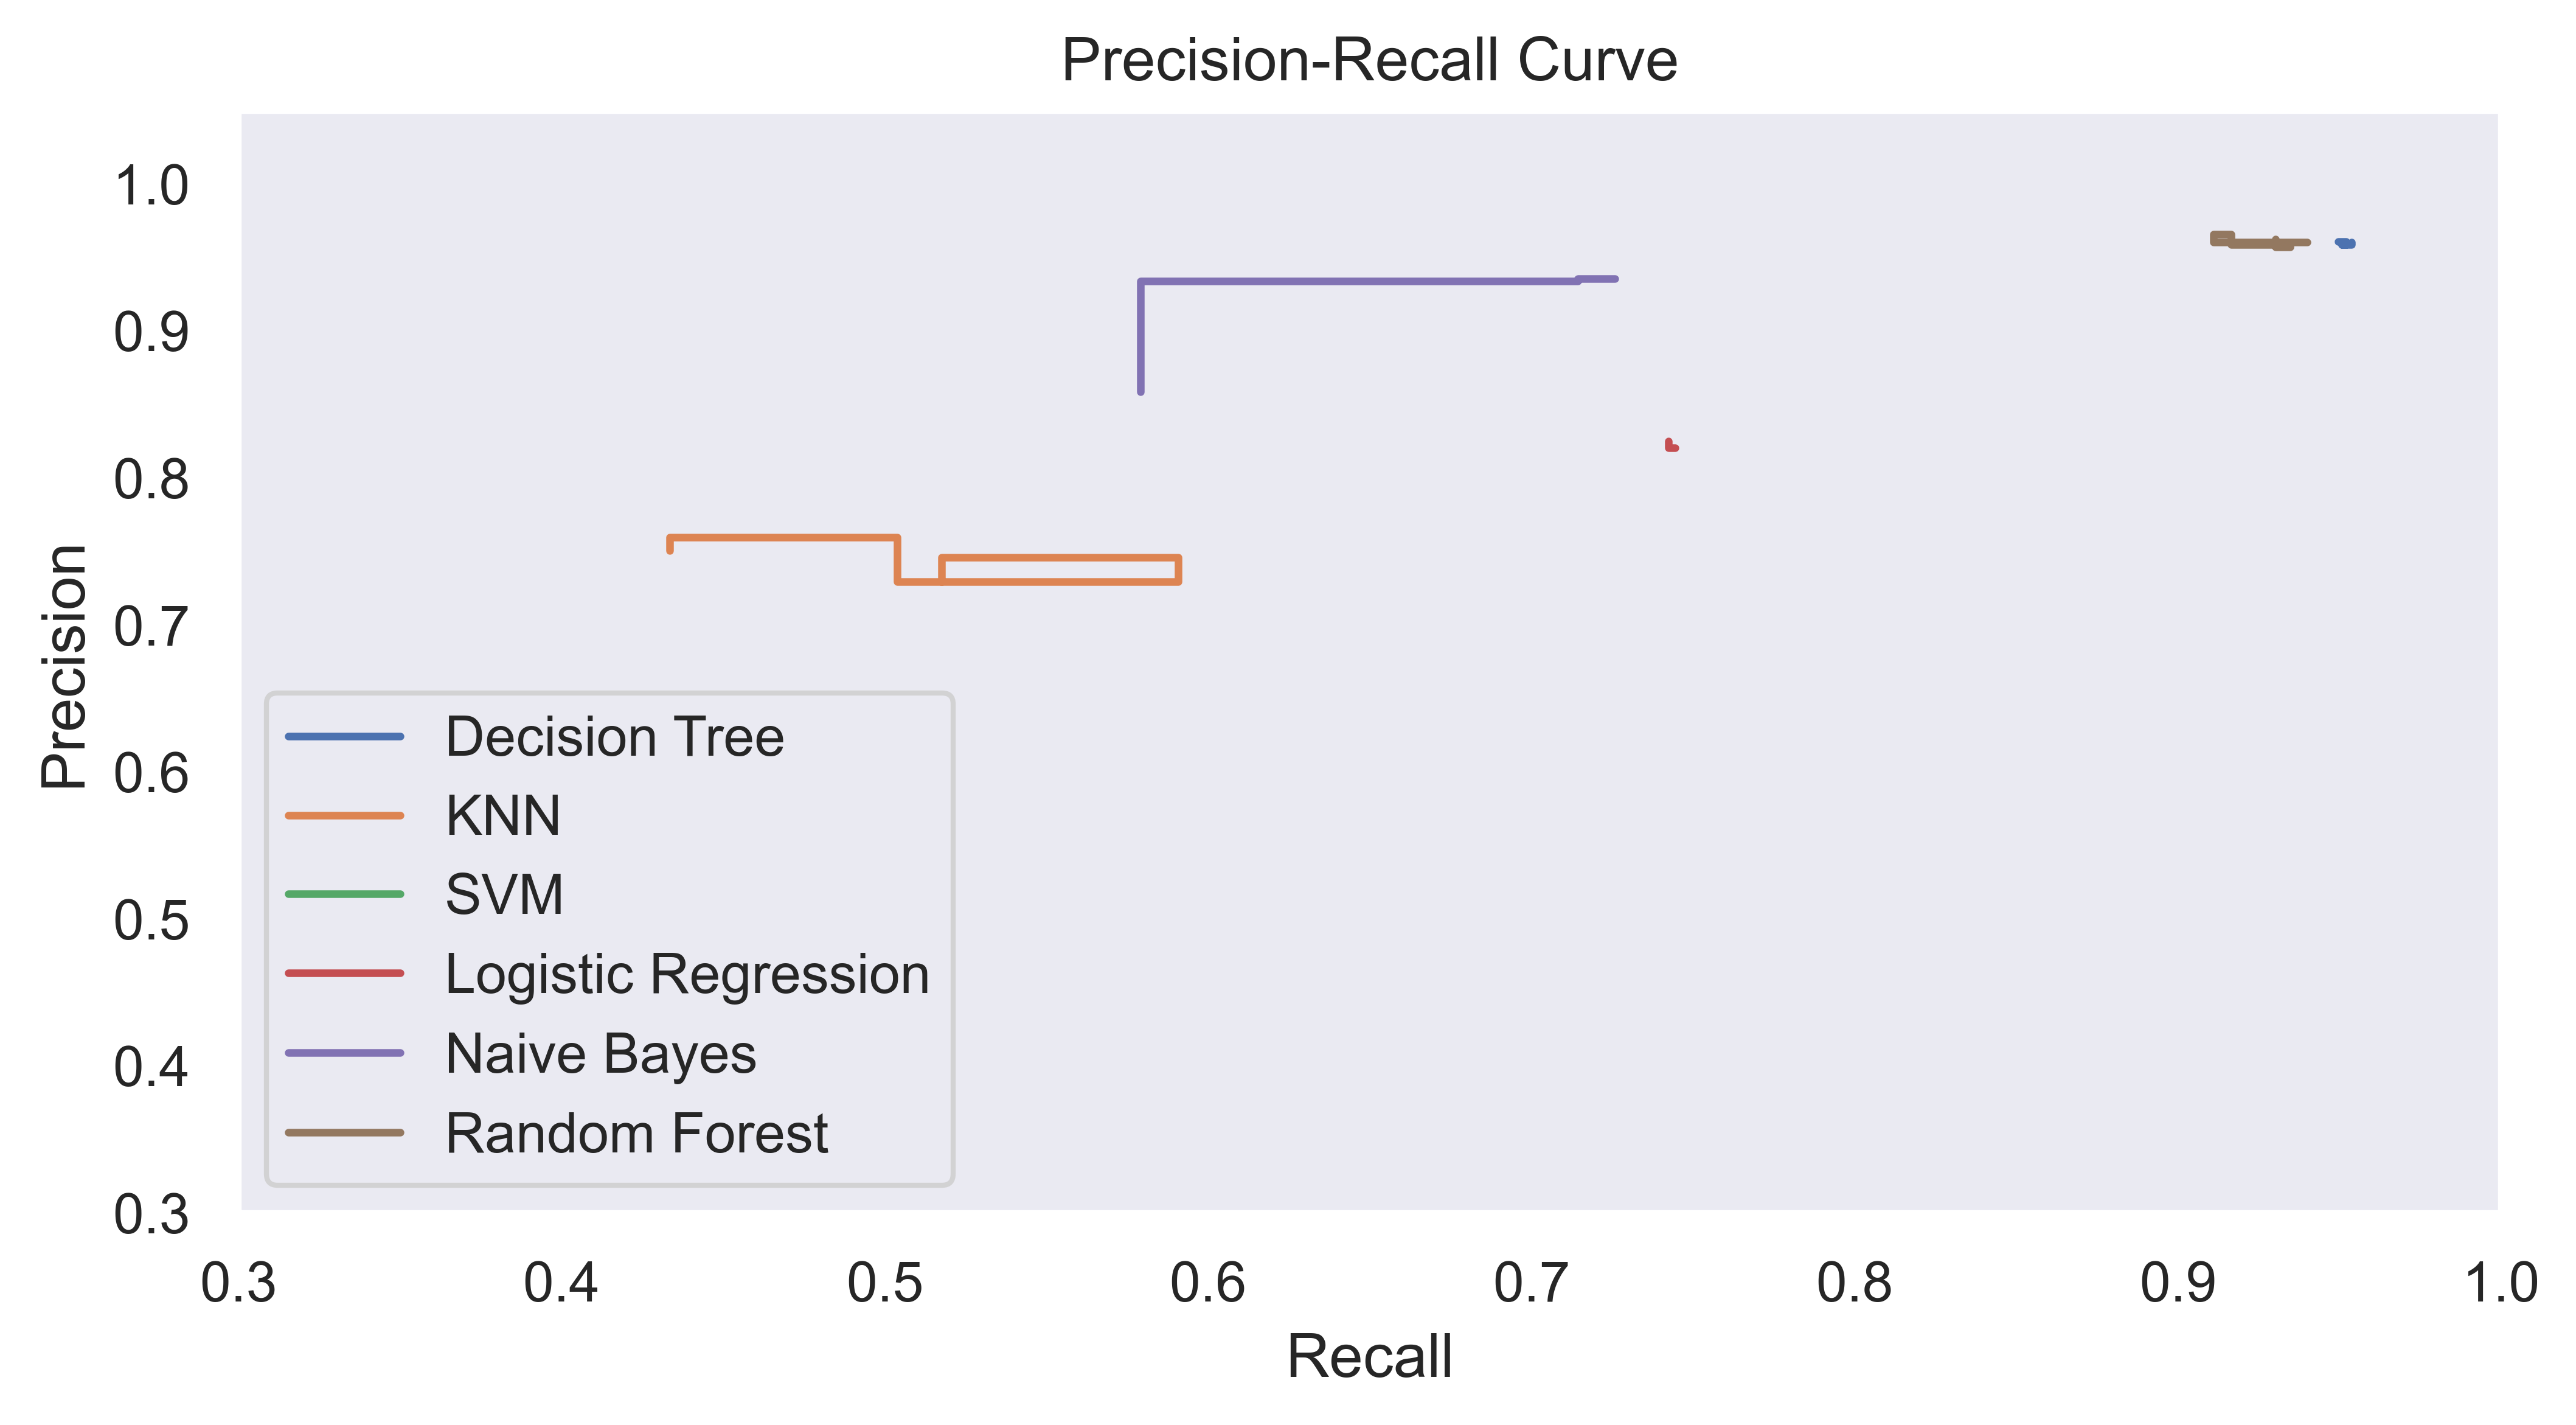

In [101]:
# Precision-Recall Curve
plt.figure(figsize = (8,4), dpi = 600)
plt.step(recall_values[0::6], precision_values[0::6], where='post', label='Decision Tree')
plt.step(recall_values[1::6], precision_values[1::6], where='post', label='KNN')
plt.step(recall_values[2::6], precision_values[2::6], where='post', label='SVM')
plt.step(recall_values[3::6], precision_values[3::6], where='post', label='Logistic Regression')
plt.step(recall_values[4::6], precision_values[4::6], where='post', label='Naive Bayes')
plt.step(recall_values[5::6], precision_values[5::6], where='post', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.3, 1.05])
plt.xlim([0.3, 1.0])
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [83]:
# Different hyper parameters version
version = [1, 2, 3, 4, 5]

In [84]:
# accuracy_values_train

In [85]:
# accuracy_values_test

In [86]:
decision_tree_accuracy_train = accuracy_values_train[0::6]
knn_accuracy_train = accuracy_values_train[1::6]
svm_accuracy_train = accuracy_values_train[2::6]
logistic_regression_accuracy_train = accuracy_values_train[3::6]
naive_bayes_accuracy_train = accuracy_values_train[4::6]
random_forest_accuracy_train = accuracy_values_train[5::6]

decision_tree_accuracy_test = accuracy_values_test[0::6]
knn_accuracy_test = accuracy_values_test[1::6]
svm_accuracy_test = accuracy_values_test[2::6]
logistic_regression_accuracy_test = accuracy_values_test[3::6]
naive_bayes_accuracy_test = accuracy_values_test[4::6]
random_forest_accuracy_test = accuracy_values_test[5::6]

In [87]:
# print('decision tree: ', decision_tree_accuracy_train)
# print('knn: ',knn_accuracy_train)
# print('svm: ',svm_accuracy_train)
# print('logistic regression: ',logistic_regression_accuracy_train)
# print('naive bayes: ',naive_bayes_accuracy_train)
# print('random forest: ',random_forest_accuracy_train)

In [88]:
print('decision tree: ', decision_tree_accuracy_test)
print('knn: ',knn_accuracy_test)
print('svm: ',svm_accuracy_test)
print('logistic regression: ',logistic_regression_accuracy_test)
print('naive bayes: ',naive_bayes_accuracy_test)
print('random forest: ',random_forest_accuracy_test)

decision tree:  [0.9554481091348644, 0.9554481091348644, 0.9547573821447073, 0.9571749266102573, 0.9571749266102573]
knn:  [0.6627525470557762, 0.694698670350544, 0.6627525470557762, 0.6720773614228976, 0.6446209635641512]
svm:  [0.7433949231566224, 0.7433949231566224, 0.7433949231566224, 0.7433949231566224, 0.7433949231566224]
logistic regression:  [0.7907097219823864, 0.7924365394577794, 0.7924365394577794, 0.7924365394577794, 0.7924365394577794]
naive bayes:  [0.8378518390606113, 0.8378518390606113, 0.8378518390606113, 0.8319806596442756, 0.7418407874287688]
random forest:  [0.9506130202037645, 0.9393887066137109, 0.9385252978760145, 0.9464686582628217, 0.9469867035054395]


In [89]:
array_list = [decision_tree_accuracy_test, knn_accuracy_test, svm_accuracy_test, logistic_regression_accuracy_test, naive_bayes_accuracy_test, random_forest_accuracy_test]
model_name = ['decision tree','knn', 'svm', 'logistic regression', 'naive bayes', 'random forest']
model_max_index = []

for i, array in enumerate(array_list):
    max_value = max(array)
    max_index = array.index(max_value) + 1
    max_value_percent = f"{max_value * 100:.2f}%"
    print(f"Highest value in {model_name[i]} array: {max_value_percent} (Version: {max_index})")
    model_max_index.append(max_index)

Highest value in decision tree array: 95.72% (Version: 4)
Highest value in knn array: 69.47% (Version: 2)
Highest value in svm array: 74.34% (Version: 1)
Highest value in logistic regression array: 79.24% (Version: 2)
Highest value in naive bayes array: 83.79% (Version: 1)
Highest value in random forest array: 95.06% (Version: 1)


In [90]:
highest_accuracy = []

for i in range(len(model_name)):
    print(model_name[i], model_max_index[i], ((model_max_index[i]*6)-6), ' + ' , i, ' => ', (((model_max_index[i]*6)-6) + i))
    highest_accuracy.append((((model_max_index[i]*6)-6) + i))

decision tree 4 18  +  0  =>  18
knn 2 6  +  1  =>  7
svm 1 0  +  2  =>  2
logistic regression 2 6  +  3  =>  9
naive bayes 1 0  +  4  =>  4
random forest 1 0  +  5  =>  5


In [91]:
highest_accuracy

[18, 7, 2, 9, 4, 5]

In [92]:
# hyperparameter_values

In [93]:
# hyperparameter_values[int(highest_accuracy[0]/6)][highest_accuracy[0]%6]

In [94]:
highest_hyperparameter = []

for i in range(len(model_name)):
    model = model_name[i]
    highest_hyperparameter.append(hyperparameter_values[int(highest_accuracy[i]/6)][highest_accuracy[i]%6])
    print('Best hyper-parameter of ', model, ' => ',highest_hyperparameter[i])

Best hyper-parameter of  decision tree  =>  DecisionTreeClassifier(max_depth=75, random_state=42)
Best hyper-parameter of  knn  =>  KNeighborsClassifier(p=1)
Best hyper-parameter of  svm  =>  SVC()
Best hyper-parameter of  logistic regression  =>  LogisticRegression(fit_intercept=False, random_state=50)
Best hyper-parameter of  naive bayes  =>  GaussianNB()
Best hyper-parameter of  random forest  =>  RandomForestClassifier()


# The highest accuracy across models

version =>  4  |  decision tree  =>  DecisionTreeClassifier(max_depth=75, random_state=42)
version =>  2  |  knn  =>  KNeighborsClassifier(p=1)
version =>  1  |  svm  =>  SVC()
version =>  2  |  logistic regression  =>  LogisticRegression(fit_intercept=False, random_state=50)
version =>  1  |  naive bayes  =>  GaussianNB()
version =>  1  |  random forest  =>  RandomForestClassifier()


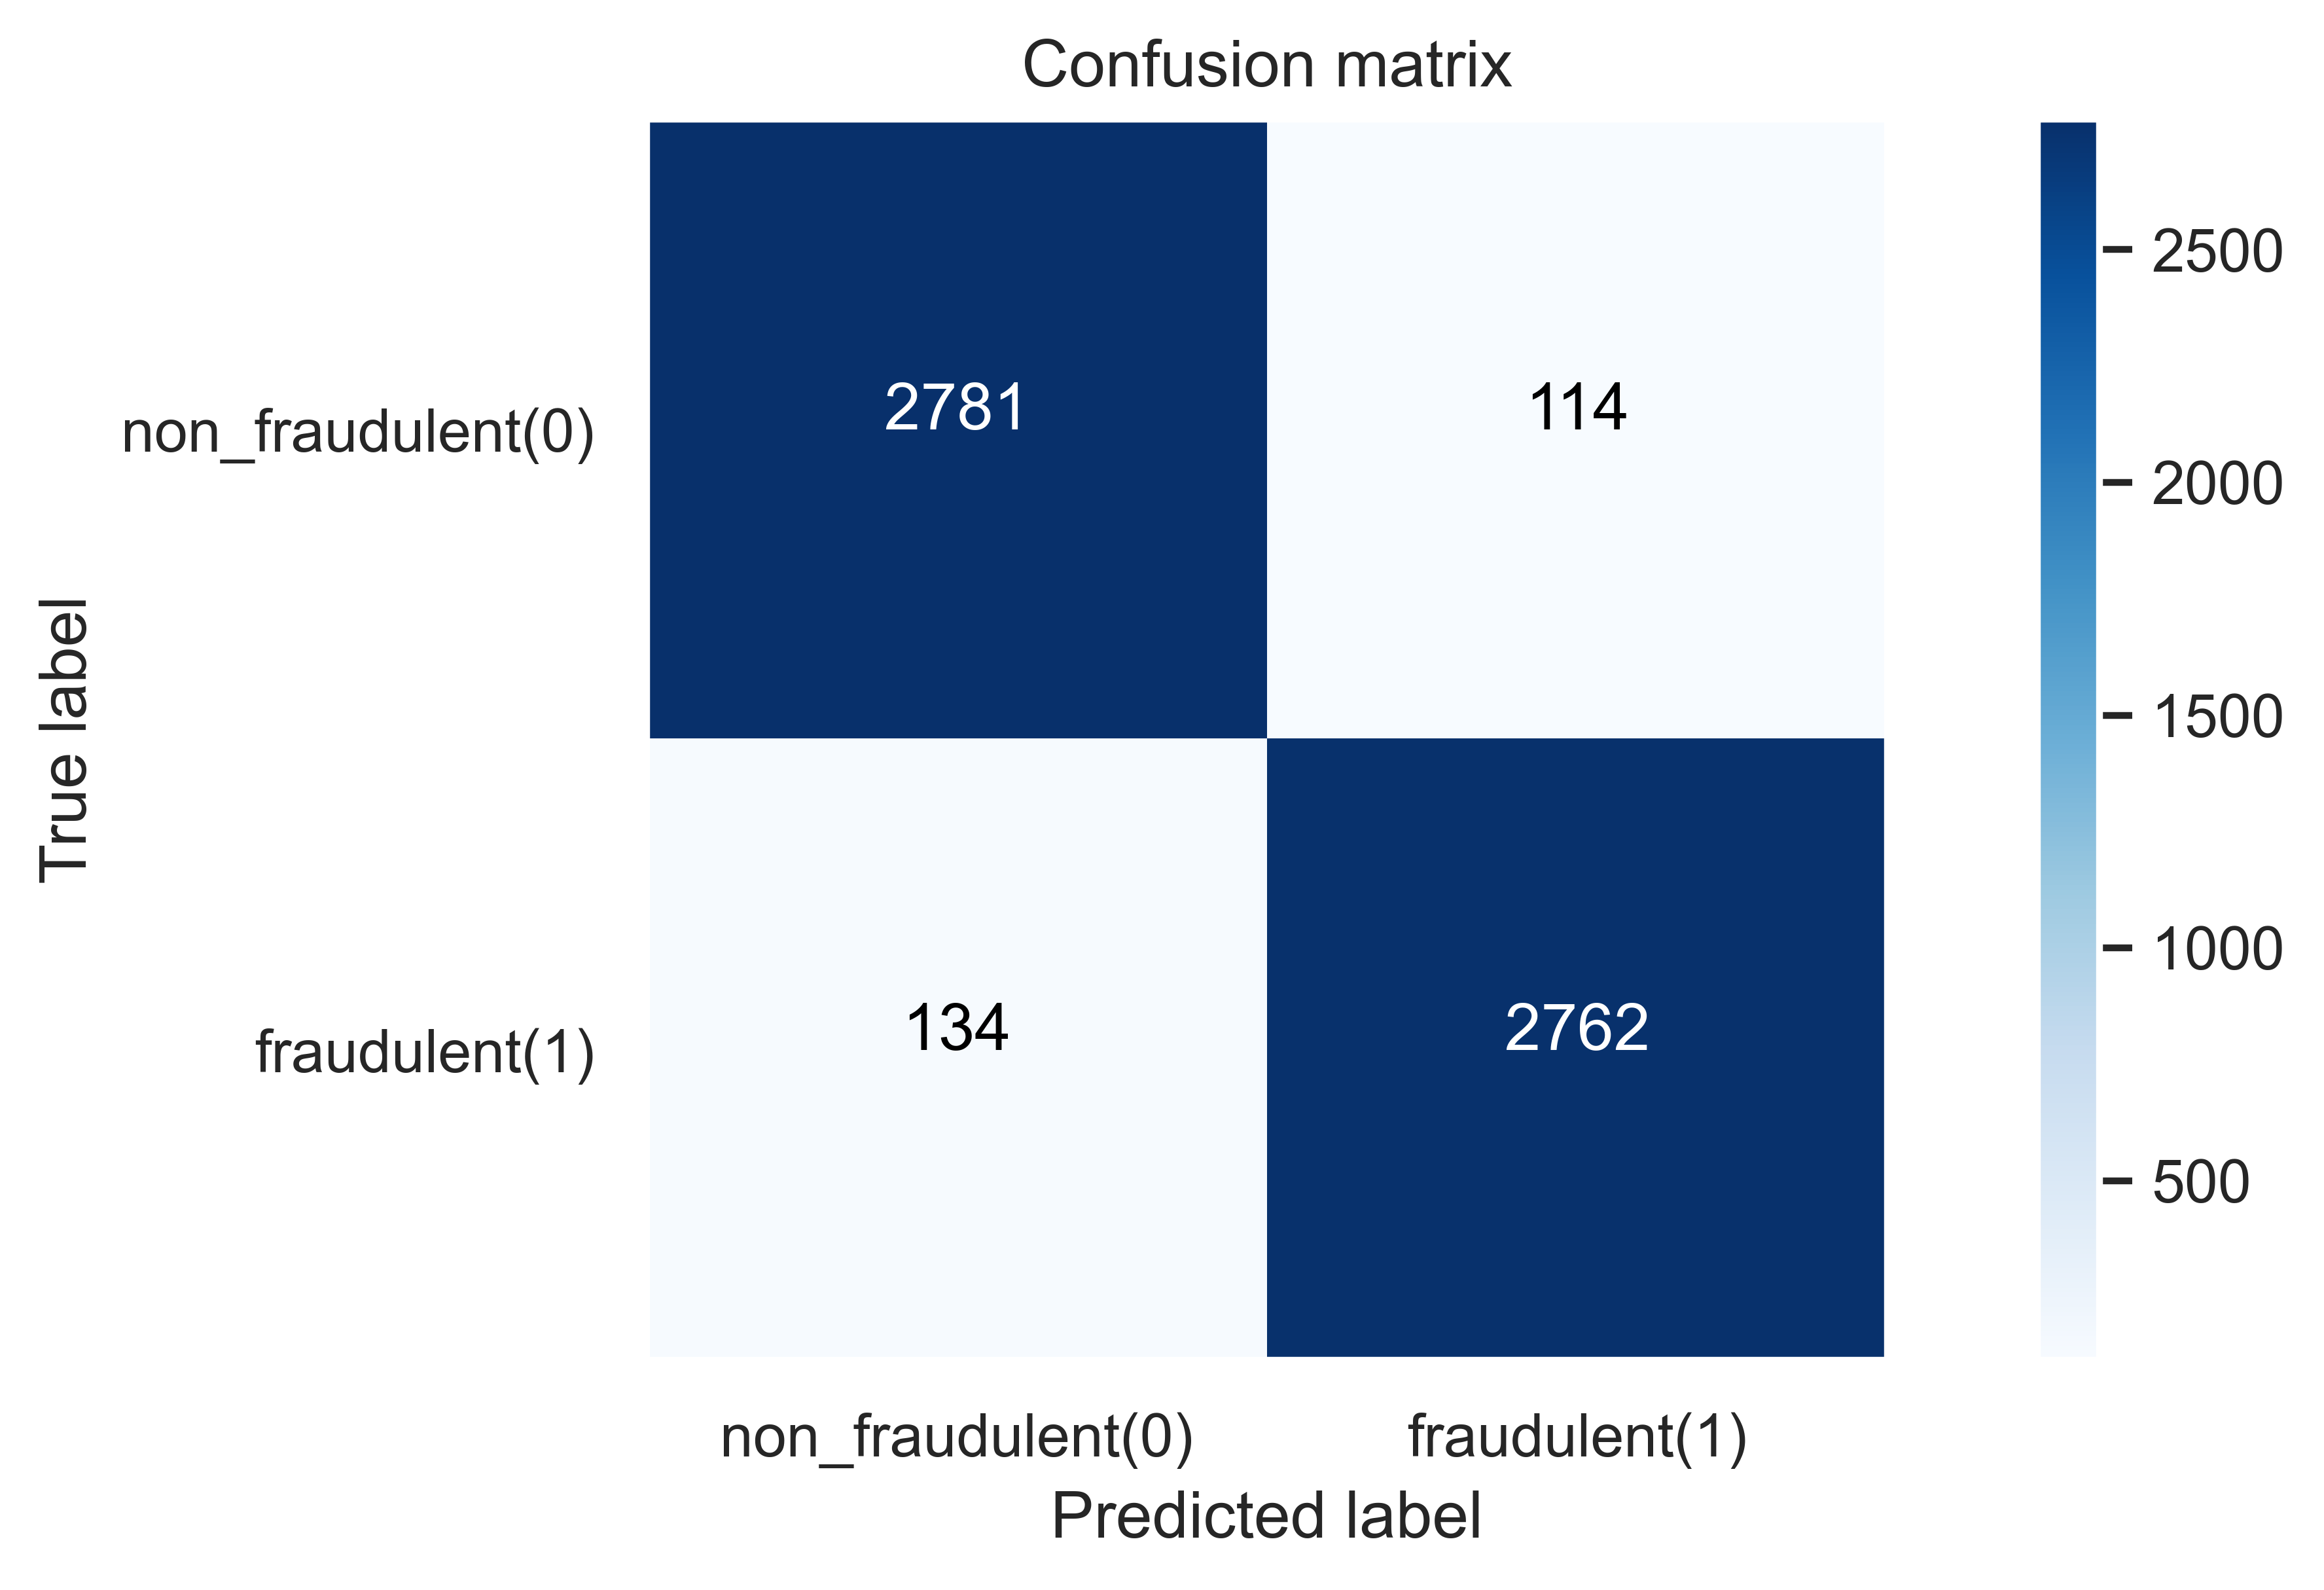

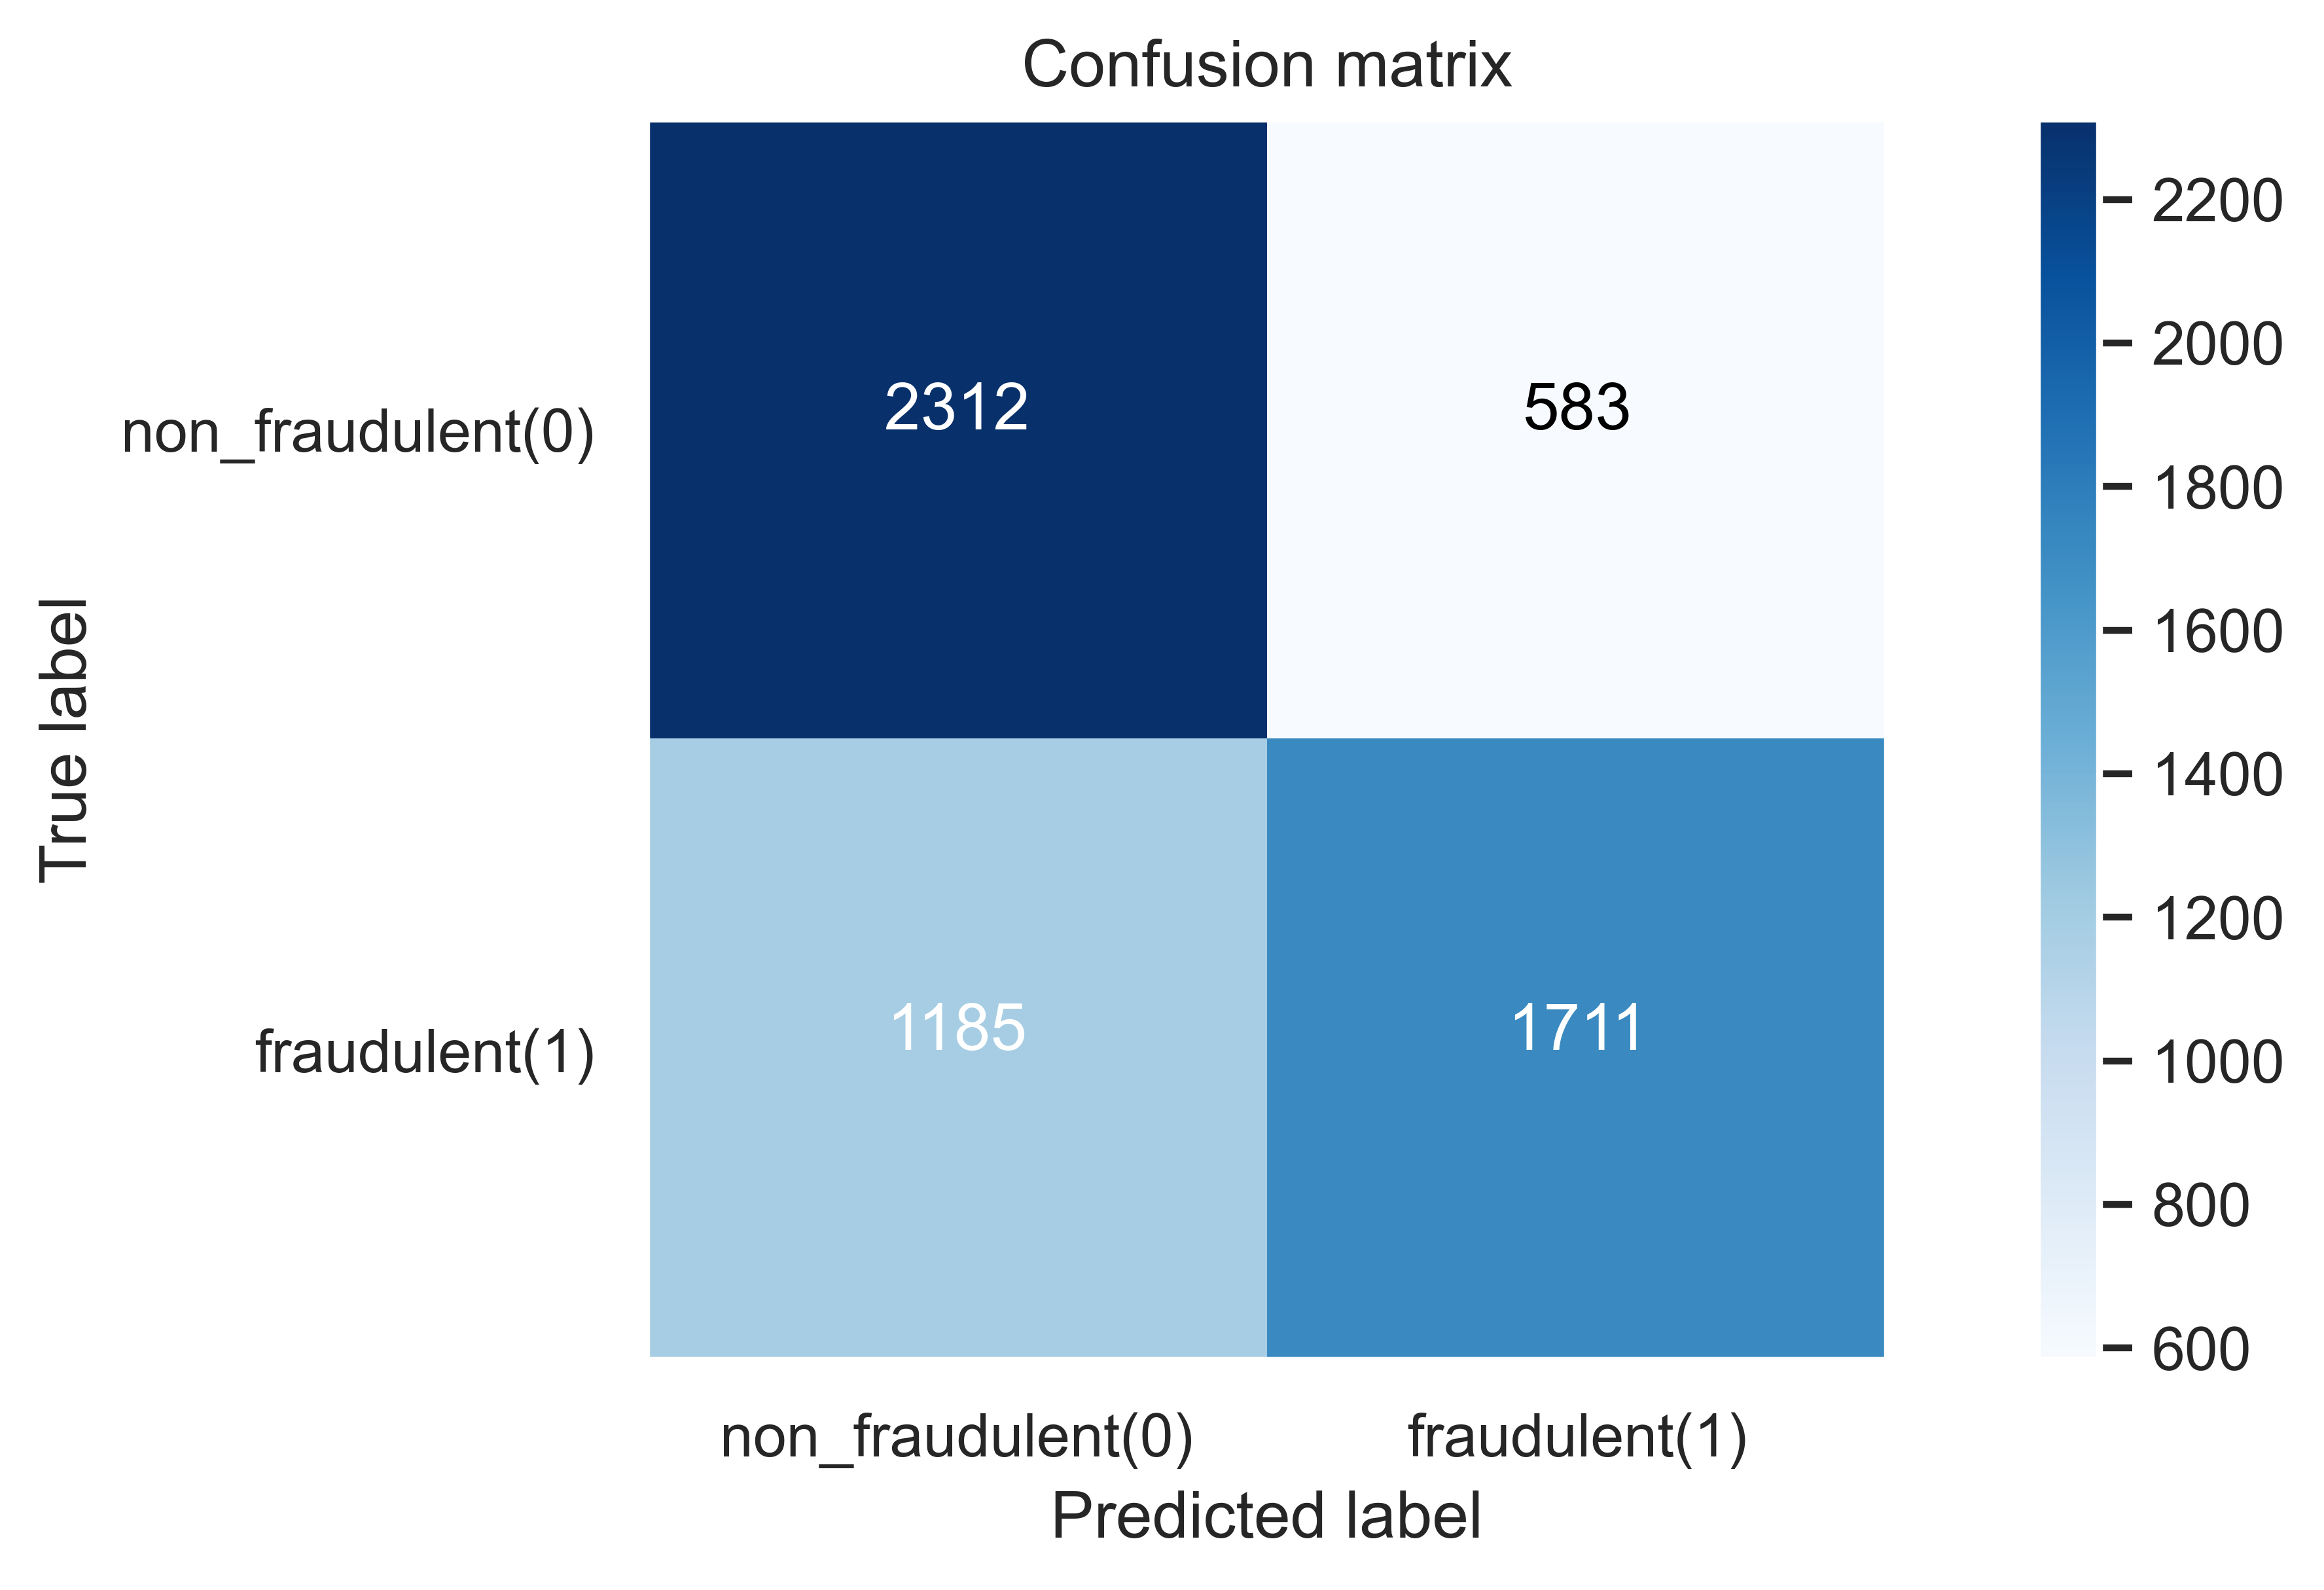

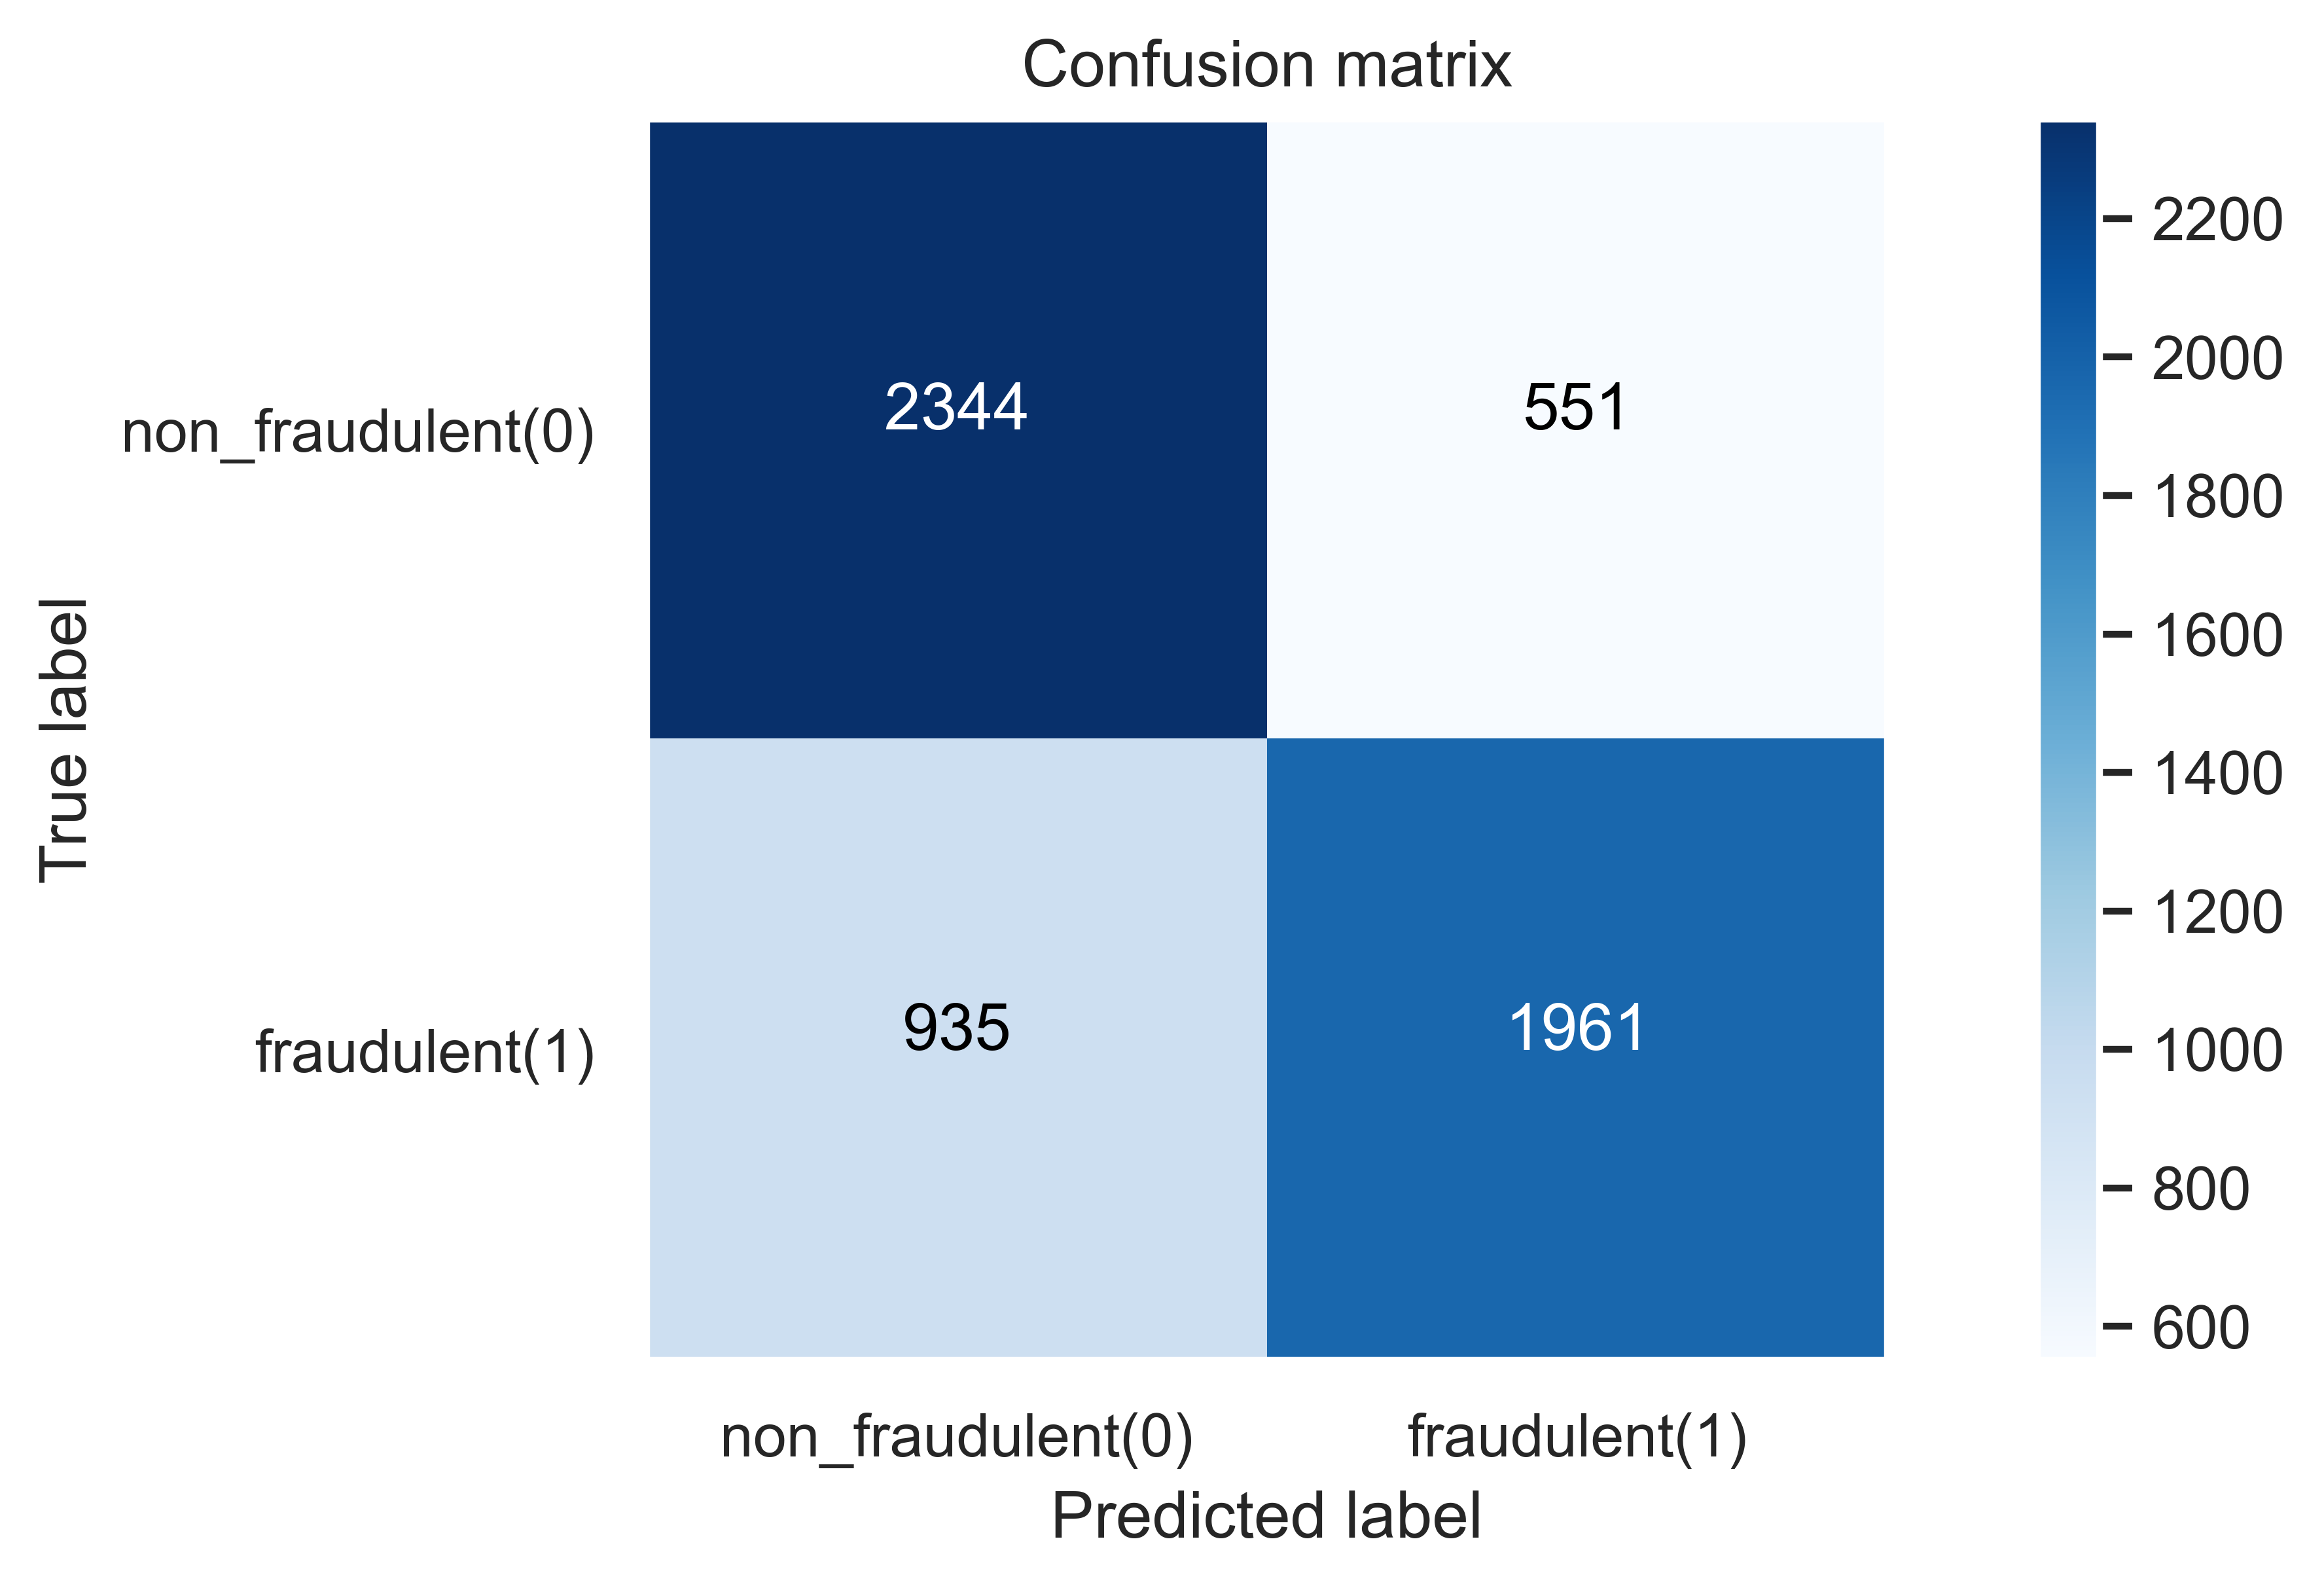

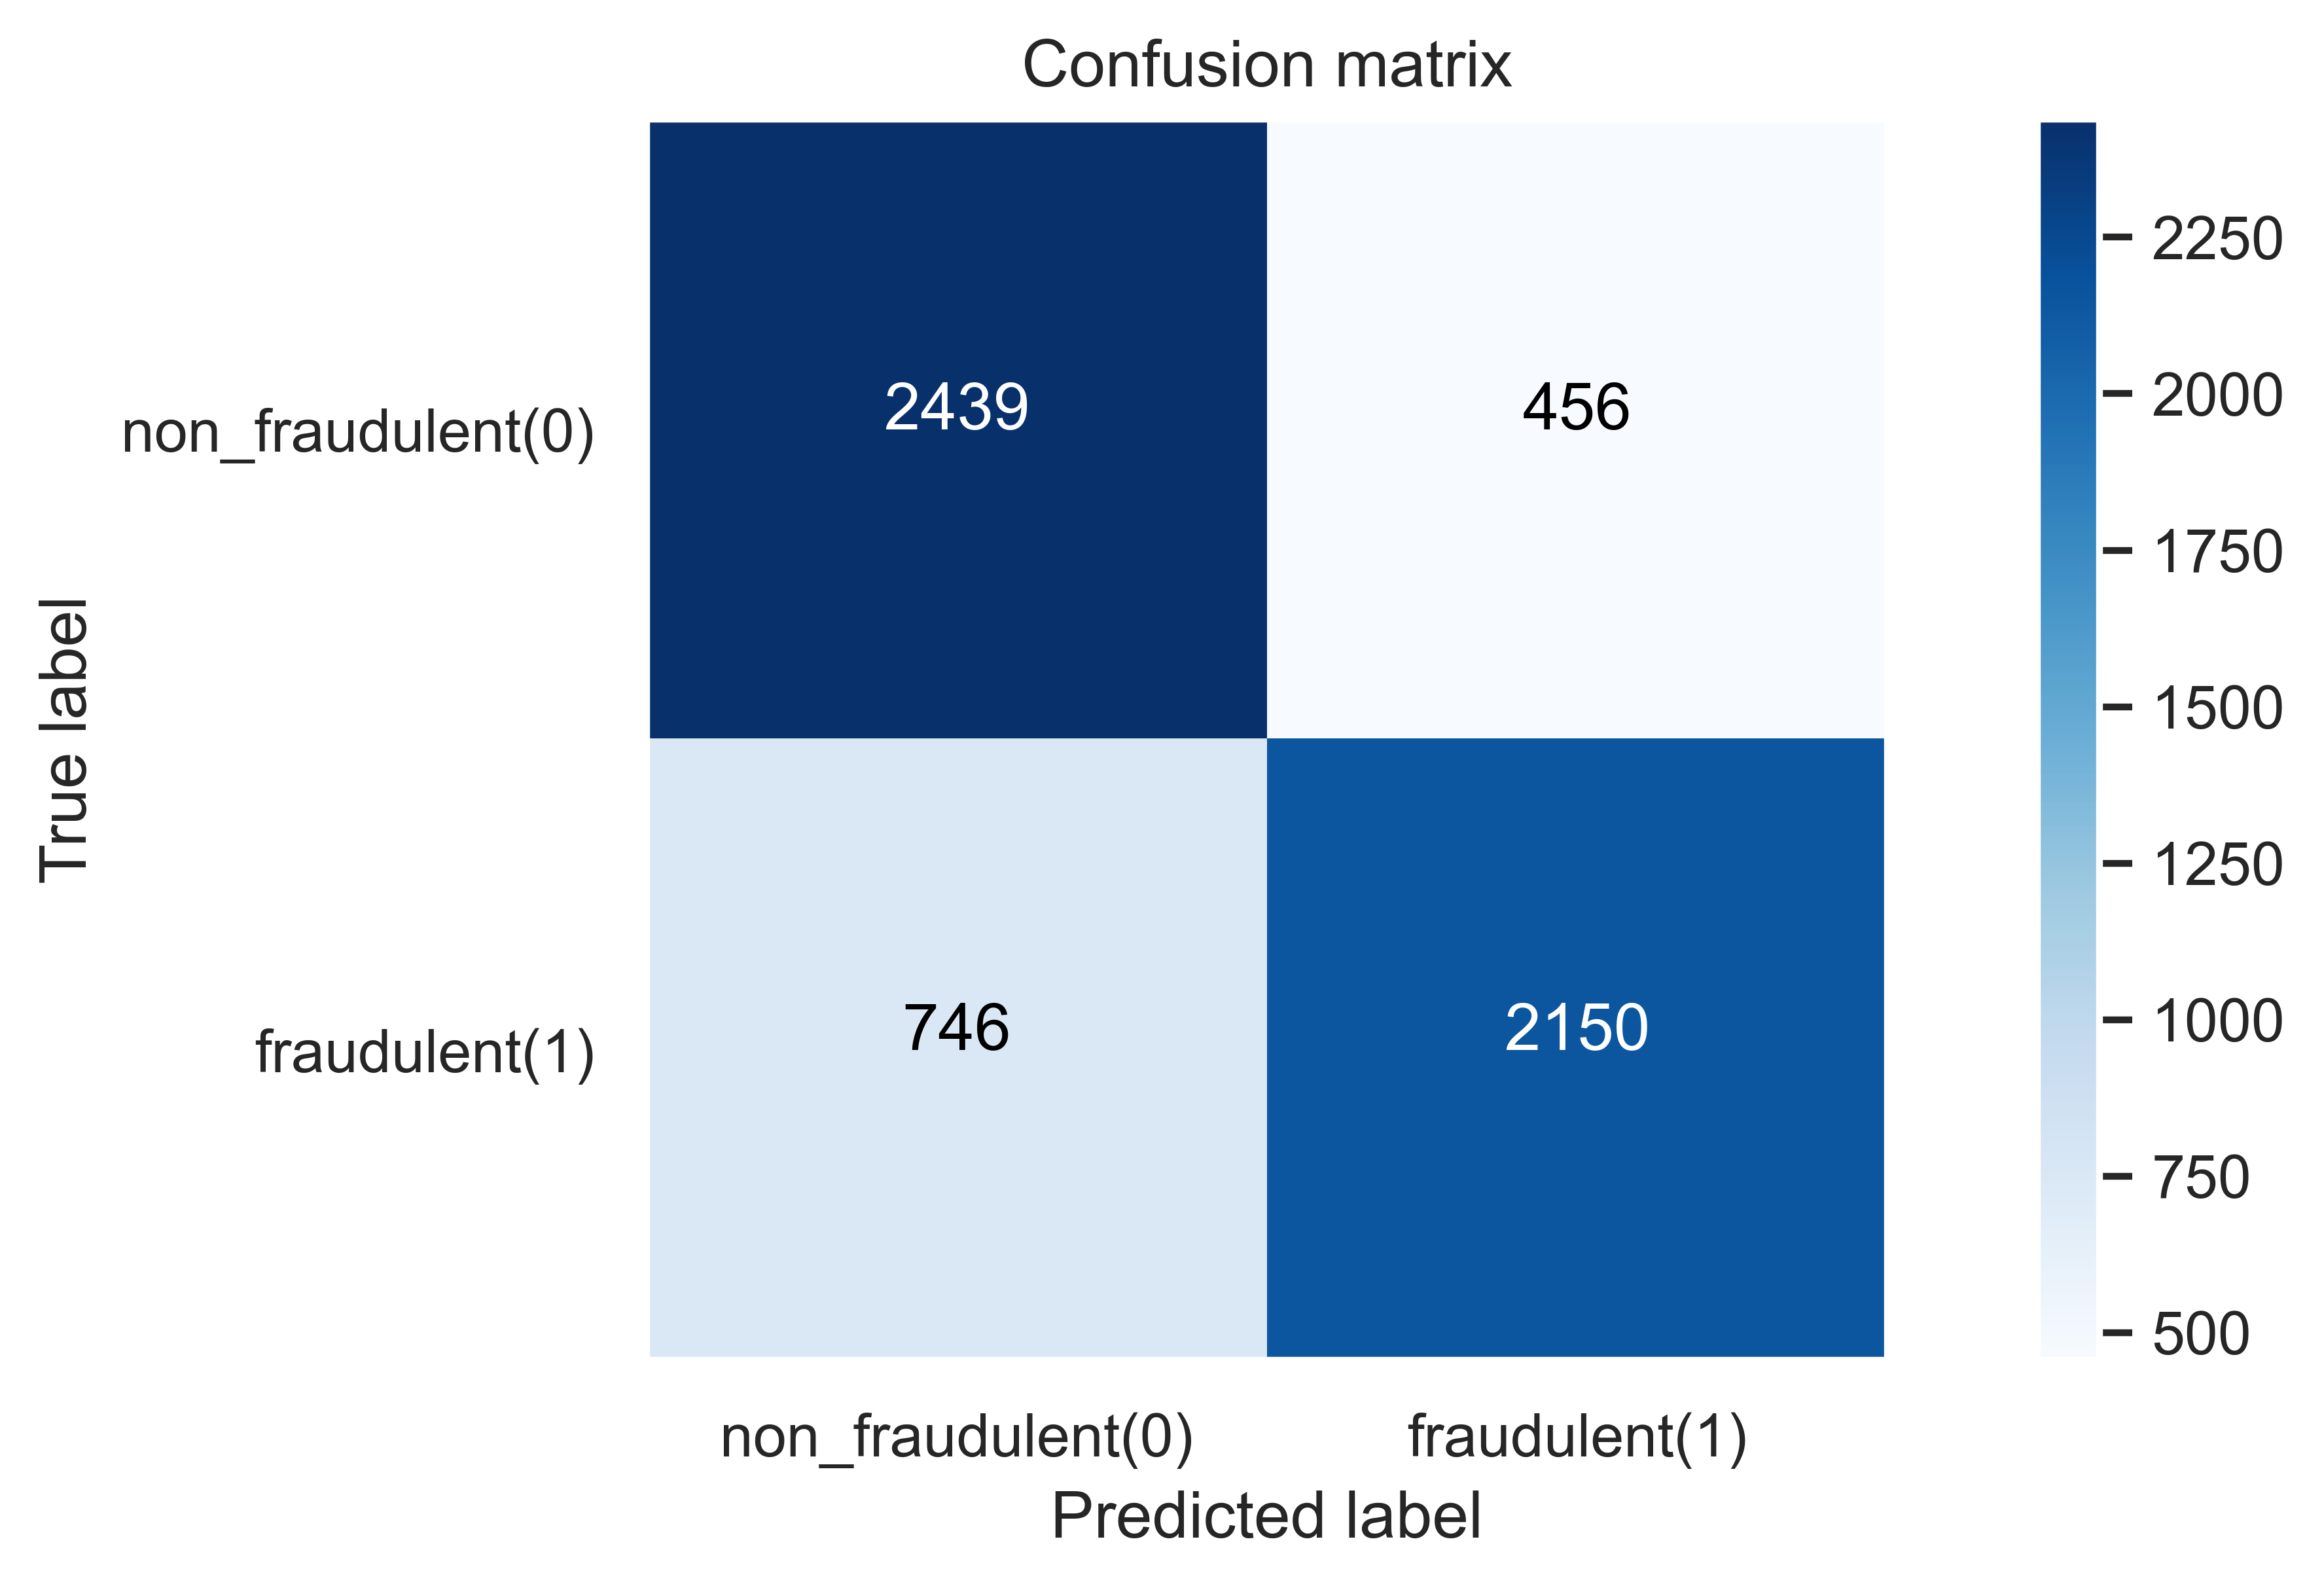

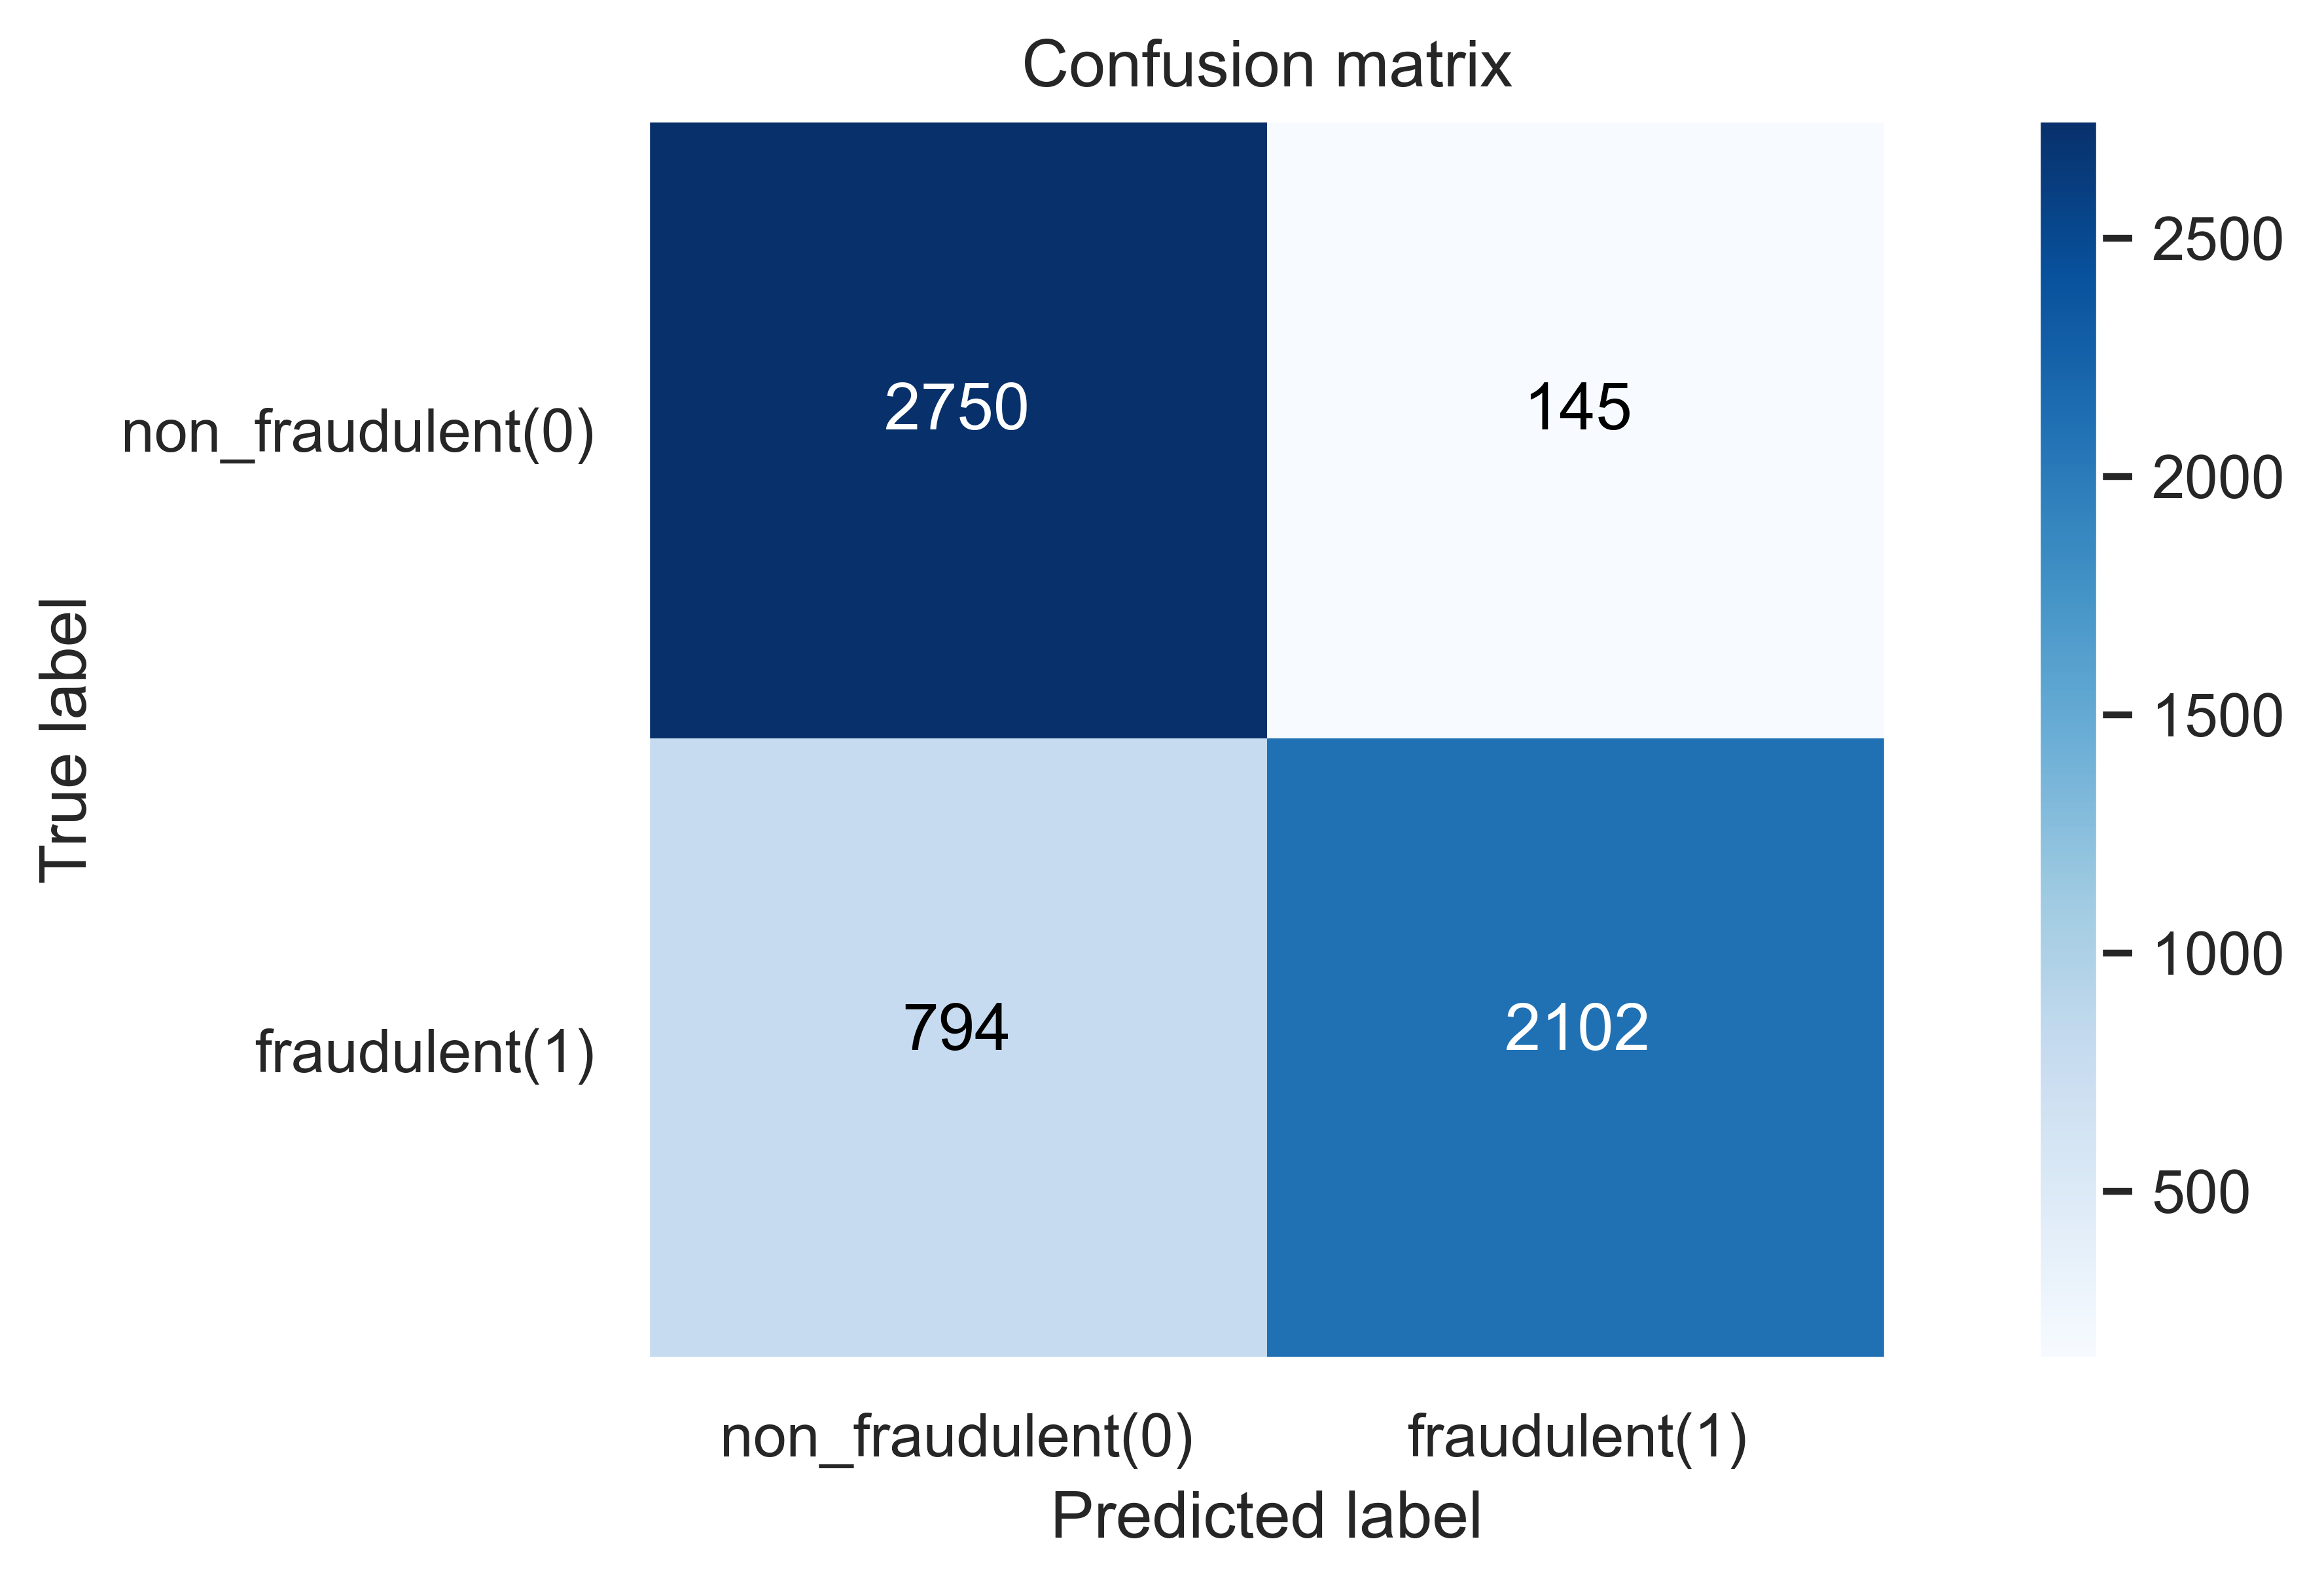

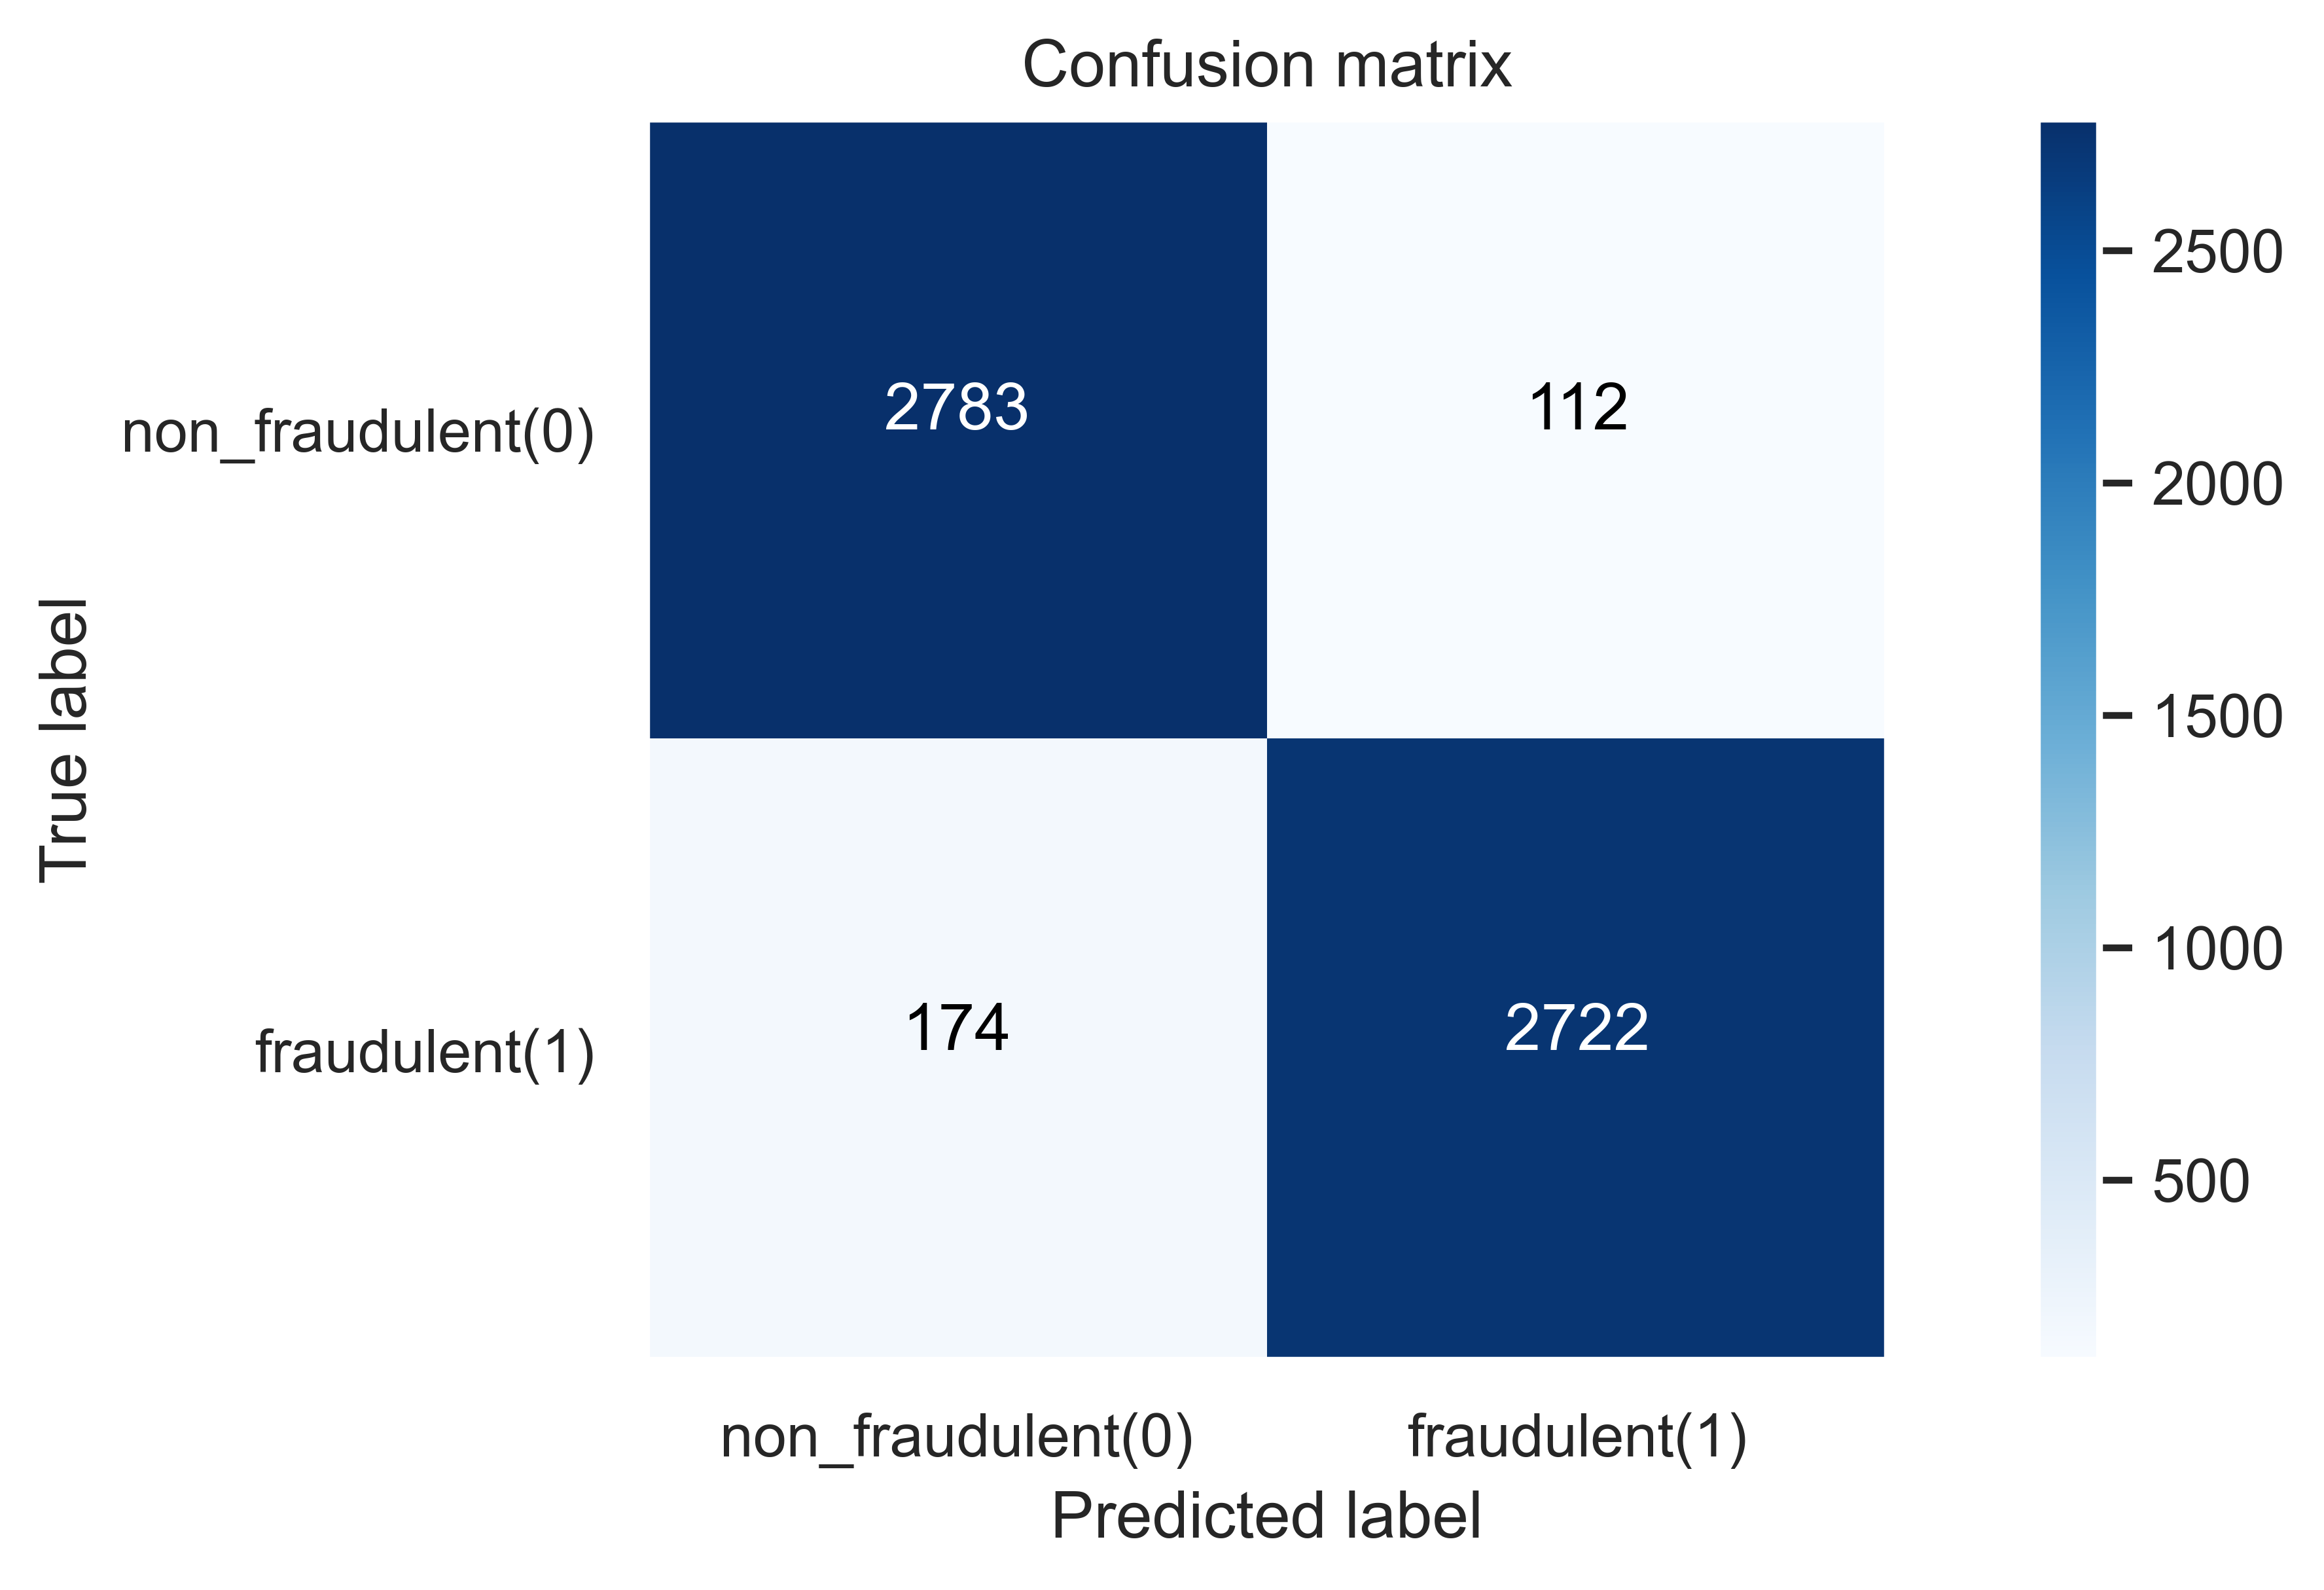

In [98]:
# Iterate over the models based on the size of the list
for i in range(len(model_name)):
    model = model_name[i]
    
    print('version => ',model_max_index[i], ' | ', model, ' => ',highest_hyperparameter[i])
    
    # Plotting the confusion metrics
    cm = confusion_matrix(y_test_values[highest_accuracy[i]], pred_test_values[highest_accuracy[i]])
    plt.figure(figsize = (8,4), dpi = 600)
    sns.set(rc = {'axes.grid' : False})
    plot_confusion_matrix(cm, classes = ['non_fraudulent(0)','fraudulent(1)'])

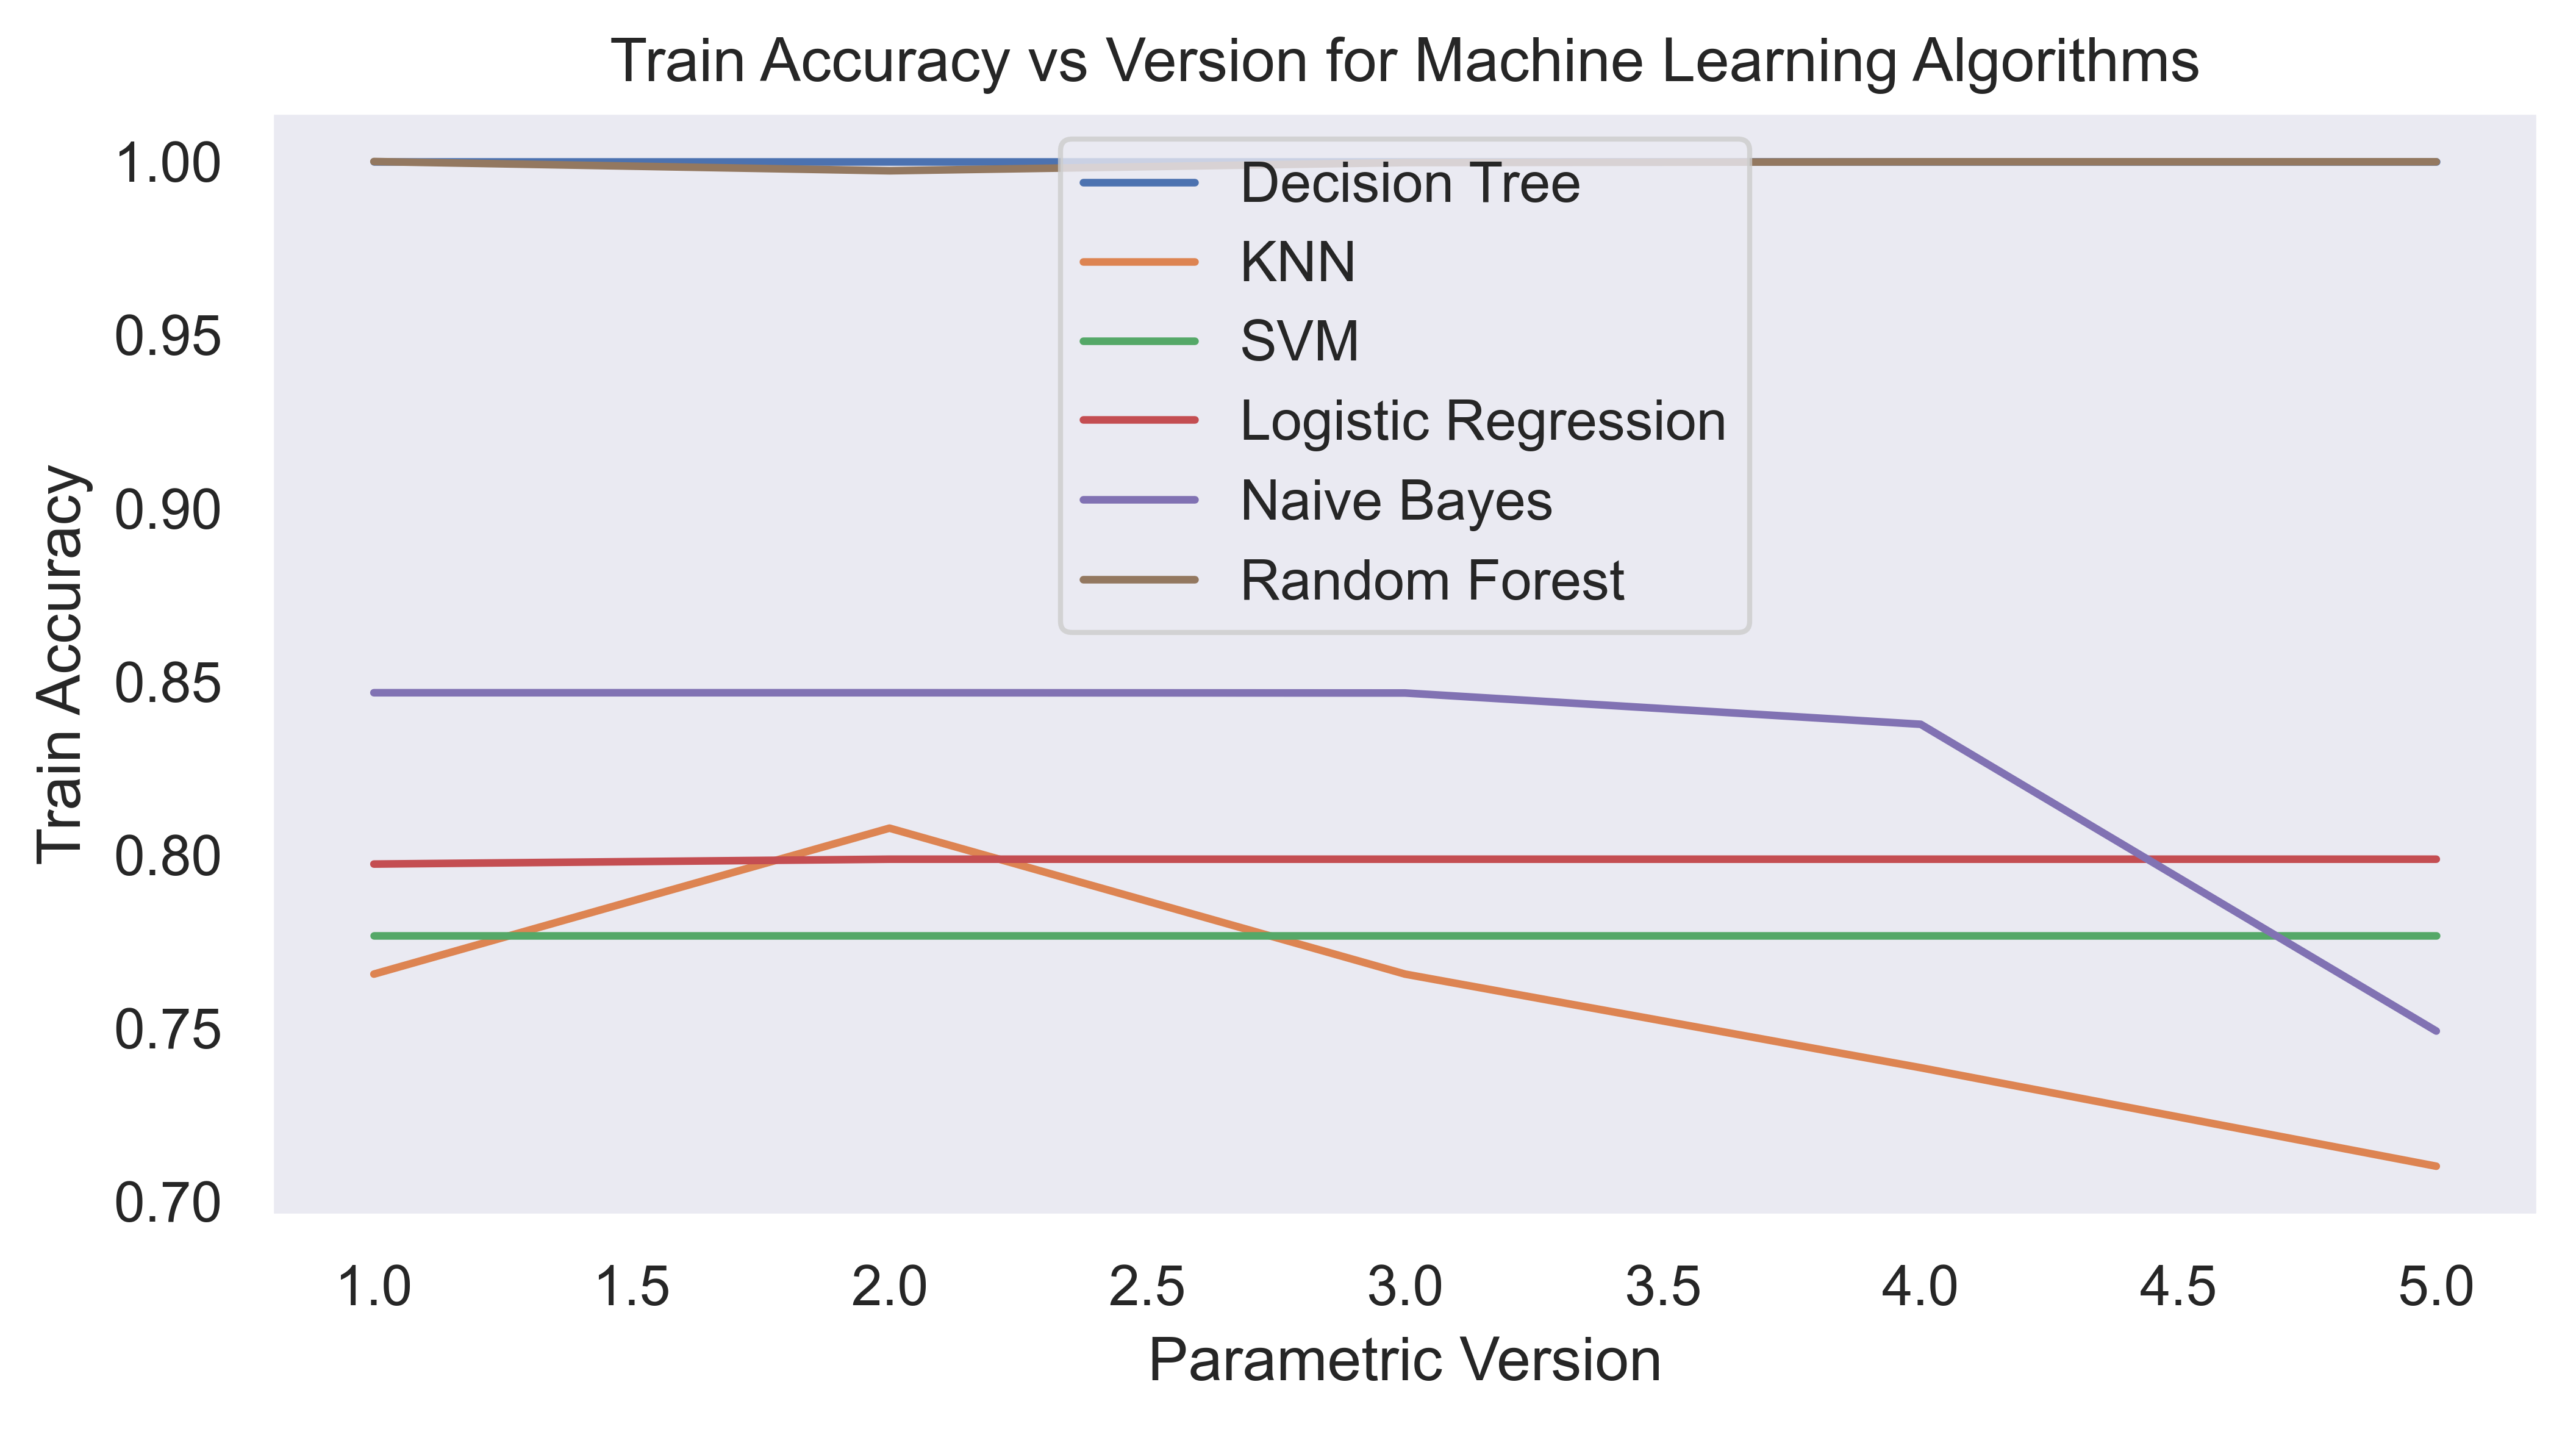

In [99]:
plt.figure(figsize = (8,4), dpi = 600)

# Plot the accuracy for each algorithm
plt.plot(version, decision_tree_accuracy_train, label='Decision Tree')
plt.plot(version, knn_accuracy_train, label='KNN')
plt.plot(version, svm_accuracy_train, label='SVM')
plt.plot(version, logistic_regression_accuracy_train, label='Logistic Regression')
plt.plot(version, naive_bayes_accuracy_train, label='Naive Bayes')
plt.plot(version, random_forest_accuracy_train, label='Random Forest')

# Set the labels and title
plt.xlabel('Parametric Version')
plt.ylabel('Train Accuracy')
plt.title('Train Accuracy vs Version for Machine Learning Algorithms')

# Add a legend
plt.legend()

# Display the plot
plt.show()

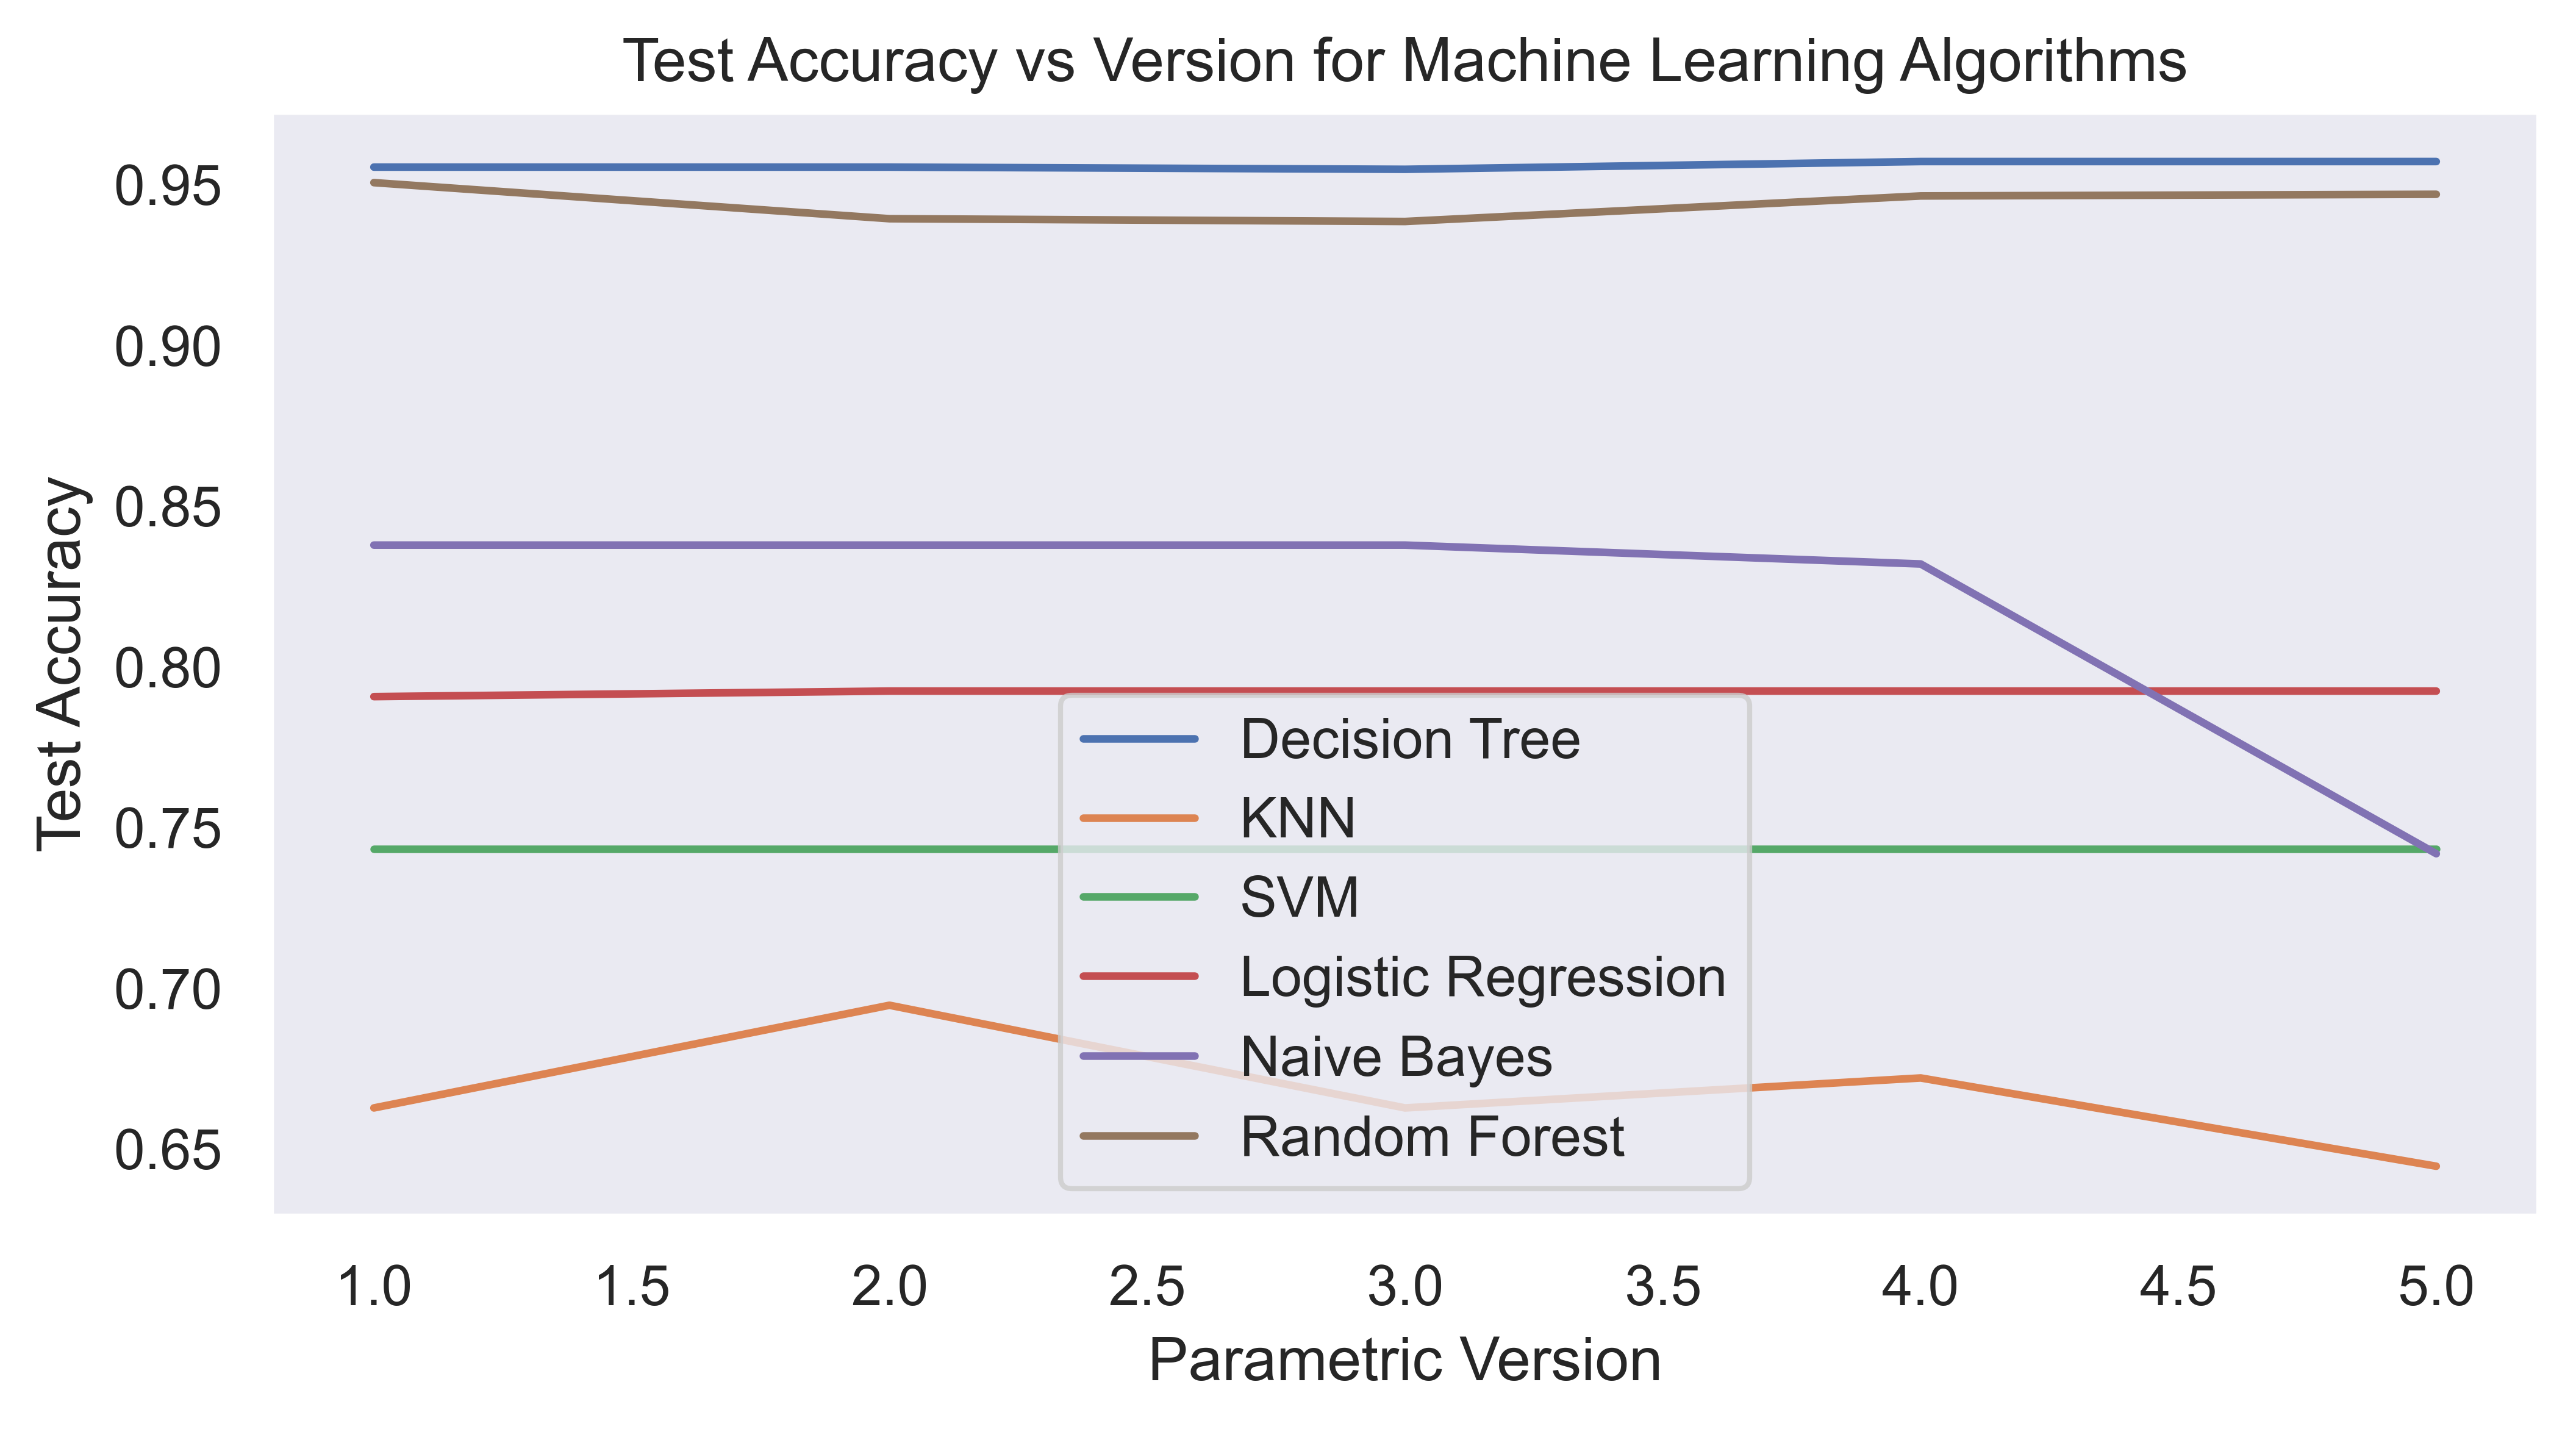

In [100]:
plt.figure(figsize = (8,4), dpi = 600)

# Plot the accuracy for each algorithm
plt.plot(version, decision_tree_accuracy_test, label='Decision Tree')
plt.plot(version, knn_accuracy_test, label='KNN')
plt.plot(version, svm_accuracy_test, label='SVM')
plt.plot(version, logistic_regression_accuracy_test, label='Logistic Regression')
plt.plot(version, naive_bayes_accuracy_test, label='Naive Bayes')
plt.plot(version, random_forest_accuracy_test, label='Random Forest')

# Set the labels and title
plt.xlabel('Parametric Version')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Version for Machine Learning Algorithms')

# Add a legend
plt.legend()

# Display the plot
plt.show()